# Rainfall Weather Forecasting

## Project Description

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia.


## Dataset Description

Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

##  Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


In [207]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [208]:
#Loading the dataset
df_rain=pd.read_csv("weatherAUS.csv")

df_rain.head(15)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


## Starting the EDA

In [209]:
# Checking Configuration of Dataset
df_rain.shape

(8425, 23)

- As the dataset contains rainfall information of 10 years and of various location, we have large entries of 8425 rows and 23 columns

In [210]:
# Checking data types of attributes
df_rain.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

- The dataset contains both numeric as well as categorical values

In [211]:
#Seperating Numerical and Categorical Column
cat_cols = [x for x in df_rain.columns if df_rain[x].dtypes=='O']

num_cols = [y for y in df_rain.columns if df_rain[y].dtypes!='O']

In [212]:
# Checking for null values if any
df_rain.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

Text(0.5, 1.0, 'NULL VALUES')

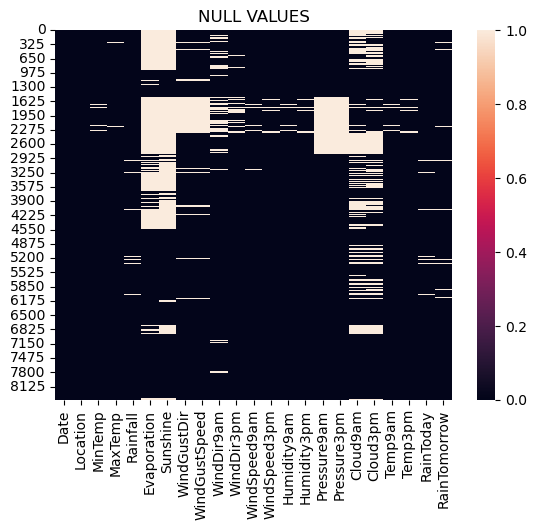

In [213]:
sns.heatmap(df_rain.isnull())
plt.title("NULL VALUES")

- We can see there are null values ar present in the dataset.

In [214]:
# checking for white space
# Iterate through each column of the dataframe and check for white spaces
for col in df_rain.columns:
    # Count the number of white spaces in the column
    num_spaces = sum(df_rain[col].astype(str).apply(lambda x: x.isspace()))

    # Display the results
    print(f"Column '{col}' has {num_spaces} white spaces.")

Column 'Date' has 0 white spaces.
Column 'Location' has 0 white spaces.
Column 'MinTemp' has 0 white spaces.
Column 'MaxTemp' has 0 white spaces.
Column 'Rainfall' has 0 white spaces.
Column 'Evaporation' has 0 white spaces.
Column 'Sunshine' has 0 white spaces.
Column 'WindGustDir' has 0 white spaces.
Column 'WindGustSpeed' has 0 white spaces.
Column 'WindDir9am' has 0 white spaces.
Column 'WindDir3pm' has 0 white spaces.
Column 'WindSpeed9am' has 0 white spaces.
Column 'WindSpeed3pm' has 0 white spaces.
Column 'Humidity9am' has 0 white spaces.
Column 'Humidity3pm' has 0 white spaces.
Column 'Pressure9am' has 0 white spaces.
Column 'Pressure3pm' has 0 white spaces.
Column 'Cloud9am' has 0 white spaces.
Column 'Cloud3pm' has 0 white spaces.
Column 'Temp9am' has 0 white spaces.
Column 'Temp3pm' has 0 white spaces.
Column 'RainToday' has 0 white spaces.
Column 'RainTomorrow' has 0 white spaces.


- There is no white space in the dataset

In [215]:
#Check for duplicate data
df_rain.duplicated().sum()

1663

- We can see dataset contain a lot of duplicate entries, thus removing it.

In [216]:
# drop duplicate values
df_rain.drop_duplicates(inplace = True)

In [217]:
# Checking for null values again
df_rain.isnull().sum()

Date                0
Location            0
MinTemp            70
MaxTemp            57
Rainfall          138
Evaporation      2921
Sunshine         3236
WindGustDir       942
WindGustSpeed     942
WindDir9am        794
WindDir3pm        294
WindSpeed9am       63
WindSpeed3pm      100
Humidity9am        54
Humidity3pm        96
Pressure9am      1308
Pressure3pm      1311
Cloud9am         1866
Cloud3pm         1902
Temp9am            51
Temp3pm            92
RainToday         138
RainTomorrow      138
dtype: int64

In [218]:
# filling the missing values of continuous cols
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_selector
filler = ColumnTransformer([('categorical_transformer', SimpleImputer(strategy='most_frequent'), cat_cols)])
df_rain[cat_cols] = filler.fit_transform(df_rain[cat_cols])

In [219]:
# filling the missing values of numerical cols
df_rain = df_rain.fillna(df_rain.mean())

In [220]:
# Rechecking the null values
df_rain.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Text(0.5, 1.0, 'NULL VALUES')

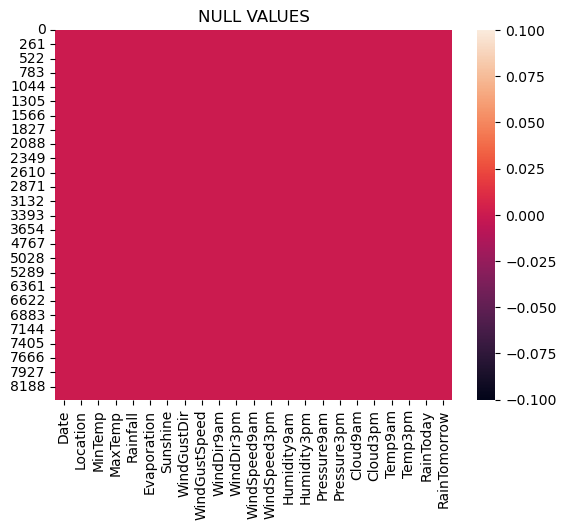

In [221]:
sns.heatmap(df_rain.isnull())
plt.title("NULL VALUES")

- We cam see there is no null value in the dataset now

In [222]:
#Checking description of dataset
df_rain.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000
mean,13.109145,24.098345,2.780148,5.302395,7.890896,38.977663,12.782206,17.571150,67.506559,50.467147,1017.626311,1015.119923,4.336806,4.320988,17.895038,22.708561
std,5.540667,6.130123,10.482769,3.343713,2.733639,13.376457,9.787577,9.548634,17.182700,18.498341,6.027914,5.967638,2.474649,2.323276,5.722411,5.971845
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.000000,19.600000,0.000000,4.000000,7.890896,30.000000,6.000000,11.000000,56.000000,38.000000,1014.200000,1011.500000,2.000000,3.000000,13.900000,18.400000
50%,13.109145,23.500000,0.000000,5.302395,7.890896,38.977663,11.000000,17.000000,68.000000,50.000000,1017.626311,1015.119923,4.336806,4.320988,17.900000,22.300000
75%,17.400000,28.400000,1.200000,5.302395,9.200000,46.000000,19.000000,24.000000,80.000000,62.000000,1020.900000,1018.400000,7.000000,6.000000,22.200000,26.800000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000



* The mean in columns:'MaxTemp', 'Rainfall', 'WindSpeed9am','WindSpeed3pm','Humidity3pm','Temp3pm' is greater than median and thus we can say Right Skewness is present in these columns.
* The mean in columns:'Humidity9am' is less than median, and thus we can say left skewness is present in the column
* The max of columns 'MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am',WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am' is exceptionally greter than 75% , so we can predict outliers must be present in these columns

In [223]:
# Checking the Unique Values in each column
df_rain.nunique()

Date             3004
Location           12
MinTemp           286
MaxTemp           332
Rainfall          251
Evaporation       117
Sunshine          141
WindGustDir        16
WindGustSpeed      53
WindDir9am         16
WindDir3pm         16
WindSpeed9am       35
WindSpeed3pm       36
Humidity9am        91
Humidity3pm        95
Pressure9am       385
Pressure3pm       375
Cloud9am           10
Cloud3pm           10
Temp9am           305
Temp3pm           329
RainToday           2
RainTomorrow        2
dtype: int64

In [224]:
# Seperating Day,Month and Year from Date Field

df_rain['Date']=pd.to_datetime(df_rain['Date']) #creating datetime type dataframe
df_rain['Day']=df_rain['Date'].apply(lambda d:d.day) #mapping day values to 'Day' column in main dataframe
df_rain['Month']=df_rain['Date'].apply(lambda m:m.month) #mapping month values to 'Month' column in main dataframe
df_rain['Year']=df_rain['Date'].apply(lambda y:y.year) #mapping month values to 'Year' column in main Date

In [225]:
df_rain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2008-12-01,Albury,13.4,22.9,0.6,5.302395,7.890896,W,44.0,W,...,1007.1,8.000000,4.320988,16.9,21.8,No,No,1,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,5.302395,7.890896,WNW,44.0,NNW,...,1007.8,4.336806,4.320988,17.2,24.3,No,No,2,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,5.302395,7.890896,WSW,46.0,W,...,1008.7,4.336806,2.000000,21.0,23.2,No,No,3,12,2008
3,2008-12-04,Albury,9.2,28.0,0.0,5.302395,7.890896,NE,24.0,SE,...,1012.8,4.336806,4.320988,18.1,26.5,No,No,4,12,2008
4,2008-12-05,Albury,17.5,32.3,1.0,5.302395,7.890896,W,41.0,ENE,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,5,12,2008


In [226]:
df_rain.shape

(6762, 26)

In [227]:
# Removing Date Column, as we have extracted Day,Month, Year details
df_rain.drop(columns='Date',axis=1,inplace=True)

In [228]:
df_rain.shape

(6762, 25)

## Visualization

### 1. Univariate Analysis

<AxesSubplot:xlabel='Year', ylabel='Count'>

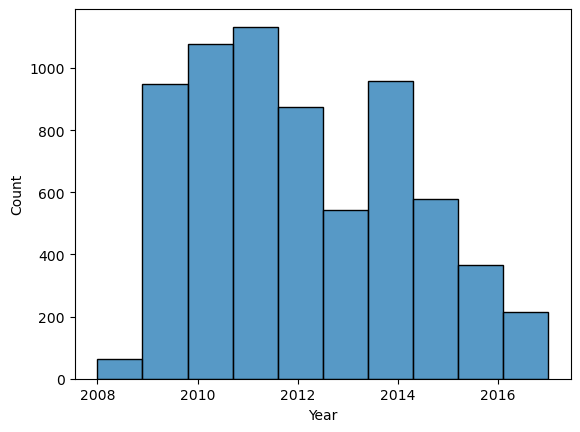

In [229]:
# Histogram plot to check distribution of rainfall according to Year
sns.histplot(df_rain['Year'],bins=10)

- We can see The maximum rainfall have been observed in the year 2011,followed by 2010, 2009&2014  and so on, and the least in 2008, followed by 2017

<AxesSubplot:xlabel='Month', ylabel='Count'>

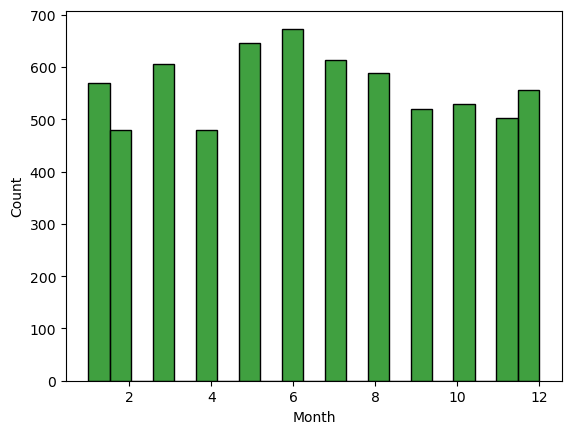

In [230]:
# Histogram plot to check distribution of attributes
sns.histplot(df_rain['Month'],color='g')

- We can see the maximum Rainfall in the months of May-June-July, but we can see it rains throughout the year in Australia

PerthAirport    1204
Albury           907
Newcastle        822
Melbourne        811
Williamtown      615
CoffsHarbour     611
Brisbane         579
Penrith          482
Darwin           250
Wollongong       237
Adelaide         205
Uluru             39
Name: Location, dtype: int64


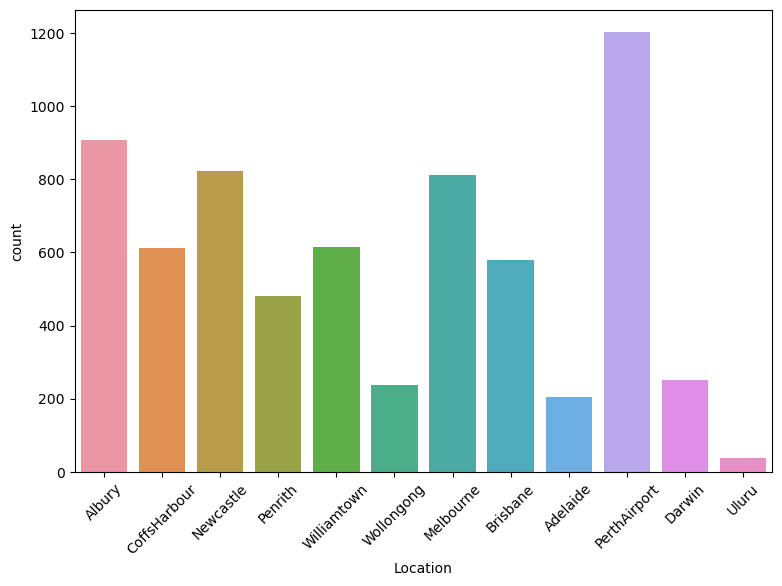

In [231]:
# Count plot to check individual value counts of 'Location'
print(df_rain['Location'].value_counts())

plt.figure(figsize=(9,6))
sns.countplot(df_rain['Location'])
plt.xticks(rotation=45)
plt.show()

- We can see the maximum number of records of Rainfall recieved are for the location 'PerthAirport', followed by 'Albury','Newcatle' and the least number of records are for 'Uluru'

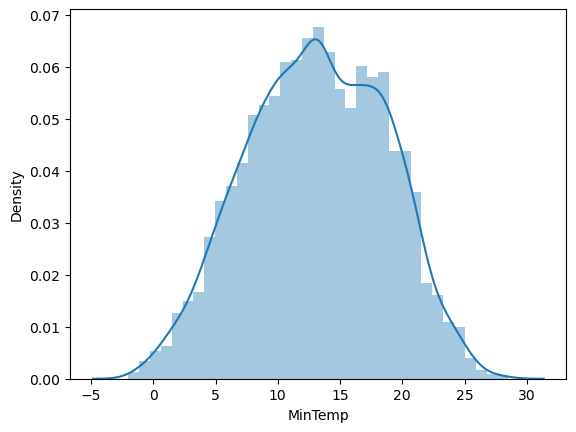

<Figure size 2000x800 with 0 Axes>

In [232]:
#Violin plot to check distribution of minimum temperature during rainfall
sns.distplot(df_rain['MinTemp'])
plt.figure(figsize=(20,8))
plt.show()

- We can see the min temp during rainfalls is registered as low as -0.3 degrees and sometimes even above 25 degrees

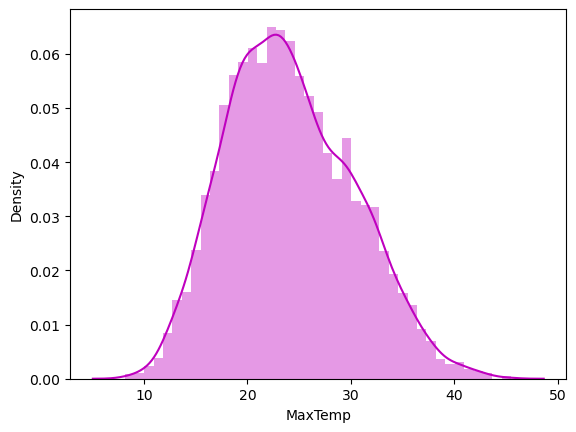

<Figure size 2000x800 with 0 Axes>

In [233]:
#Violin plot to check distribution of maximum temperature during rainfall
sns.distplot(df_rain['MaxTemp'],color='m')
plt.figure(figsize=(20,8))
plt.show()

- We can see the minimu temp during rainfalls is registered as low as 5-6 degrees and sometimes even above 45 degrees

E      1460
SW      465
N       459
W       434
WSW     420
WNW     398
SSE     390
S       376
SE      370
ENE     357
NE      300
SSW     299
NW      296
NNE     287
ESE     267
NNW     184
Name: WindGustDir, dtype: int64


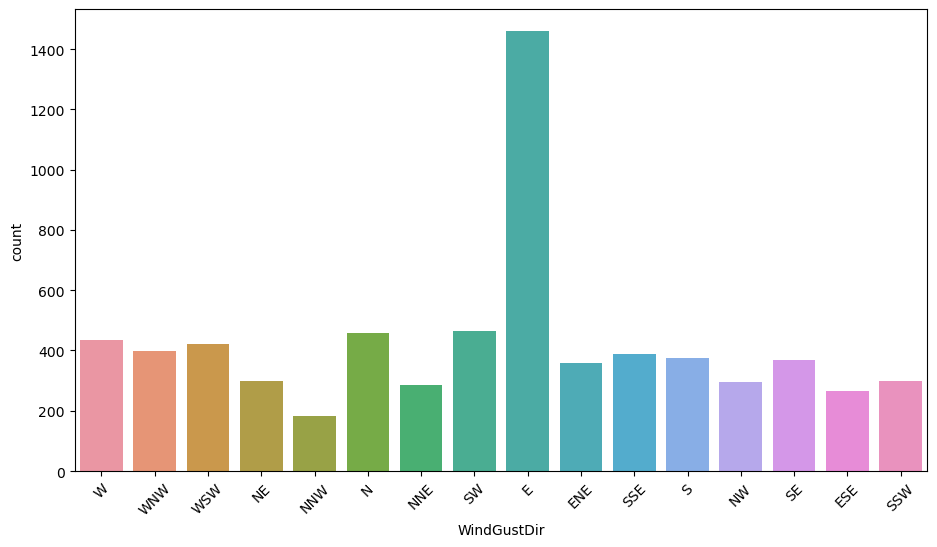

In [234]:
# Count plot to check individual value counts of WindGustDir'
print(df_rain['WindGustDir'].value_counts())

plt.figure(figsize=(11,6))
sns.countplot(df_rain['WindGustDir'])
plt.xticks(rotation=45)
plt.show()

- The WindGust Direction is mostly in the East direction.

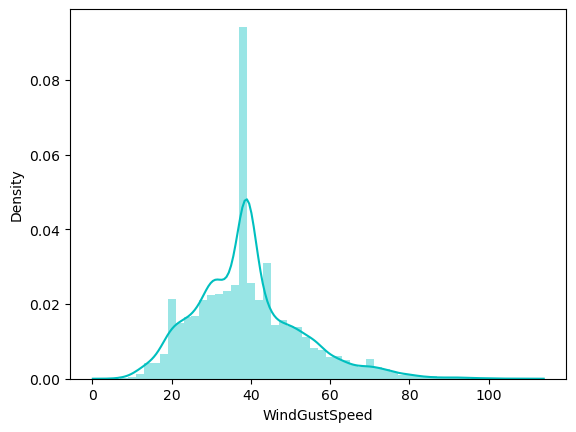

<Figure size 1000x800 with 0 Axes>

In [235]:
#Violin plot to check distribution of WindGustSpeed during rainfall
sns.distplot(df_rain['WindGustSpeed'],color='c')
plt.figure(figsize=(10,8))
plt.show()

- The WindGust speed mostly falls in the range of 35-45, sometimes it has 0 speed and sometimes speed goes above 80-90 too

No     5190
Yes    1572
Name: RainToday, dtype: int64


(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

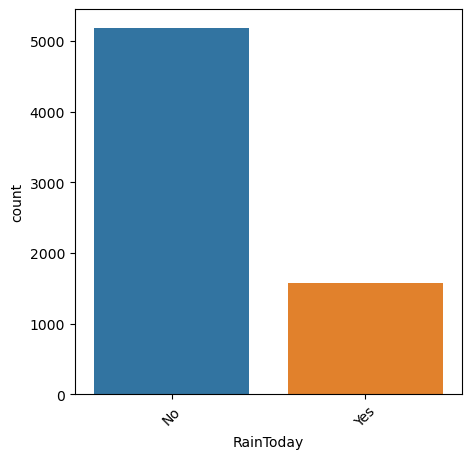

In [236]:
# Count plot to check individual value counts of RainToday'
print(df_rain['RainToday'].value_counts())

plt.figure(figsize=(5,5))
sns.countplot(df_rain['RainToday'])
plt.xticks(rotation=45)



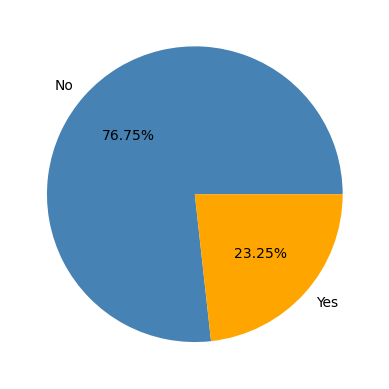

In [237]:
fig, ax = plt.subplots()
ax.pie(df_rain['RainToday'].value_counts(),labels = ['No','Yes'], radius=1,autopct='%1.2f%%',colors=['steelblue','orange'])

plt.show()

- As per the values of dataset, percentage of rainfall today is 23.25%, while percentage of no rainfall is 76.75%

No     5190
Yes    1572
Name: RainTomorrow, dtype: int64


(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

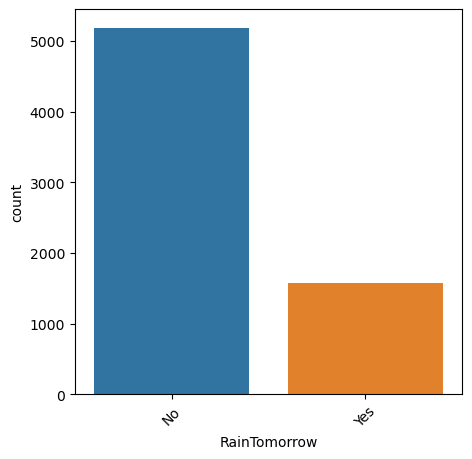

In [238]:
# Count plot to check individual value counts of RainTomorrow'
print(df_rain['RainTomorrow'].value_counts())

plt.figure(figsize=(5,5))
sns.countplot(df_rain['RainTomorrow'])
plt.xticks(rotation=45)



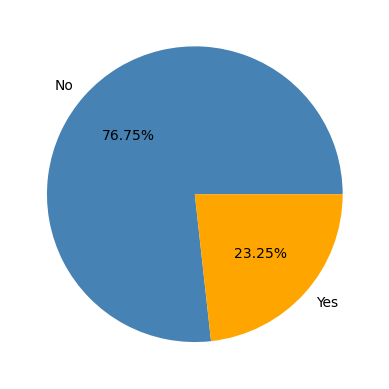

In [239]:
fig, ax = plt.subplots()
ax.pie(df_rain['RainTomorrow'].value_counts(),labels = ['No','Yes'], radius=1,autopct='%1.2f%%',colors=['steelblue','orange'])

plt.show()

- The similar ratio for rainfall and no-rainfall falls for RainTomorrow 

In [240]:
# Distribution plot to check skewness in the features

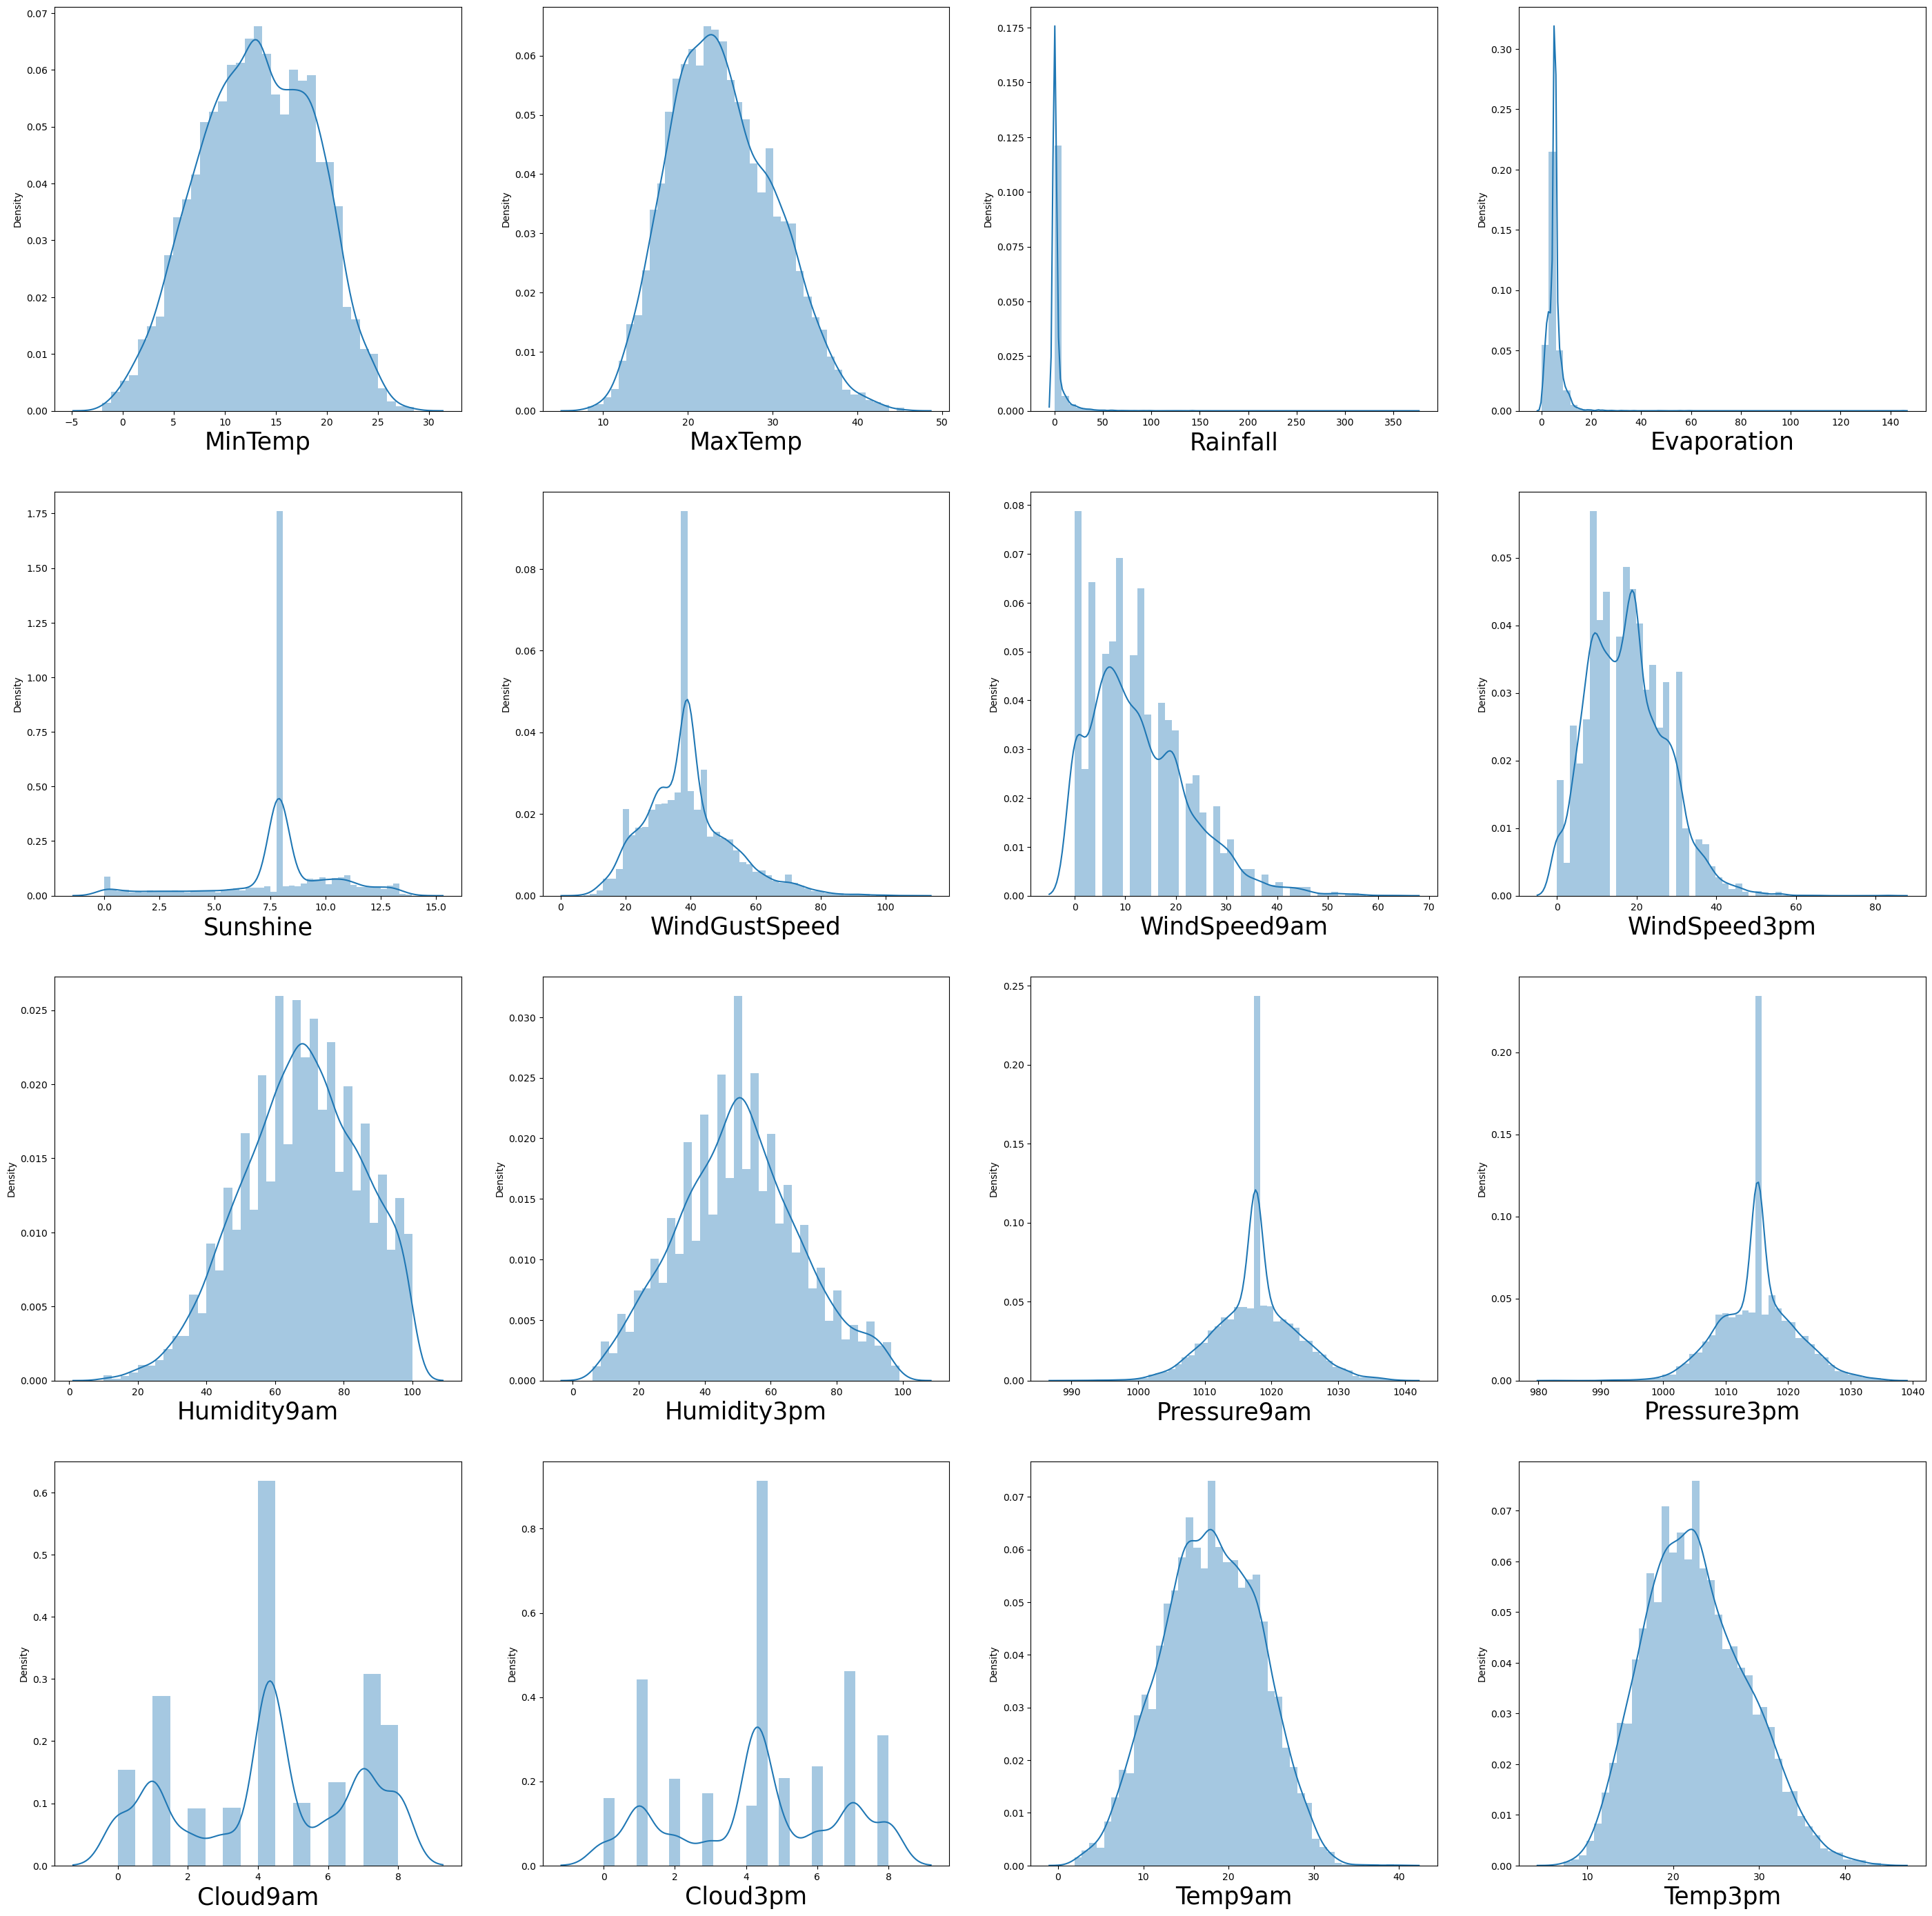

In [241]:
plt.figure(figsize=(35,35))
plotnumber=1

for column in df_rain[num_cols]:
    if plotnumber<=16: #as there are 16 numerical columns 
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df_rain[column])
        plt.xlabel(column,fontsize=25)
    plotnumber +=1
plt.show()

- We can see right skewness in columns: 'MaxTemp', 'Rainfall','Evaporation', 'WindSpeed9am','WindSpeed3pm','Humidity3pm','Temp3pm' and left skewness in column 'Humidity9am' 

### Box plot to check outliers

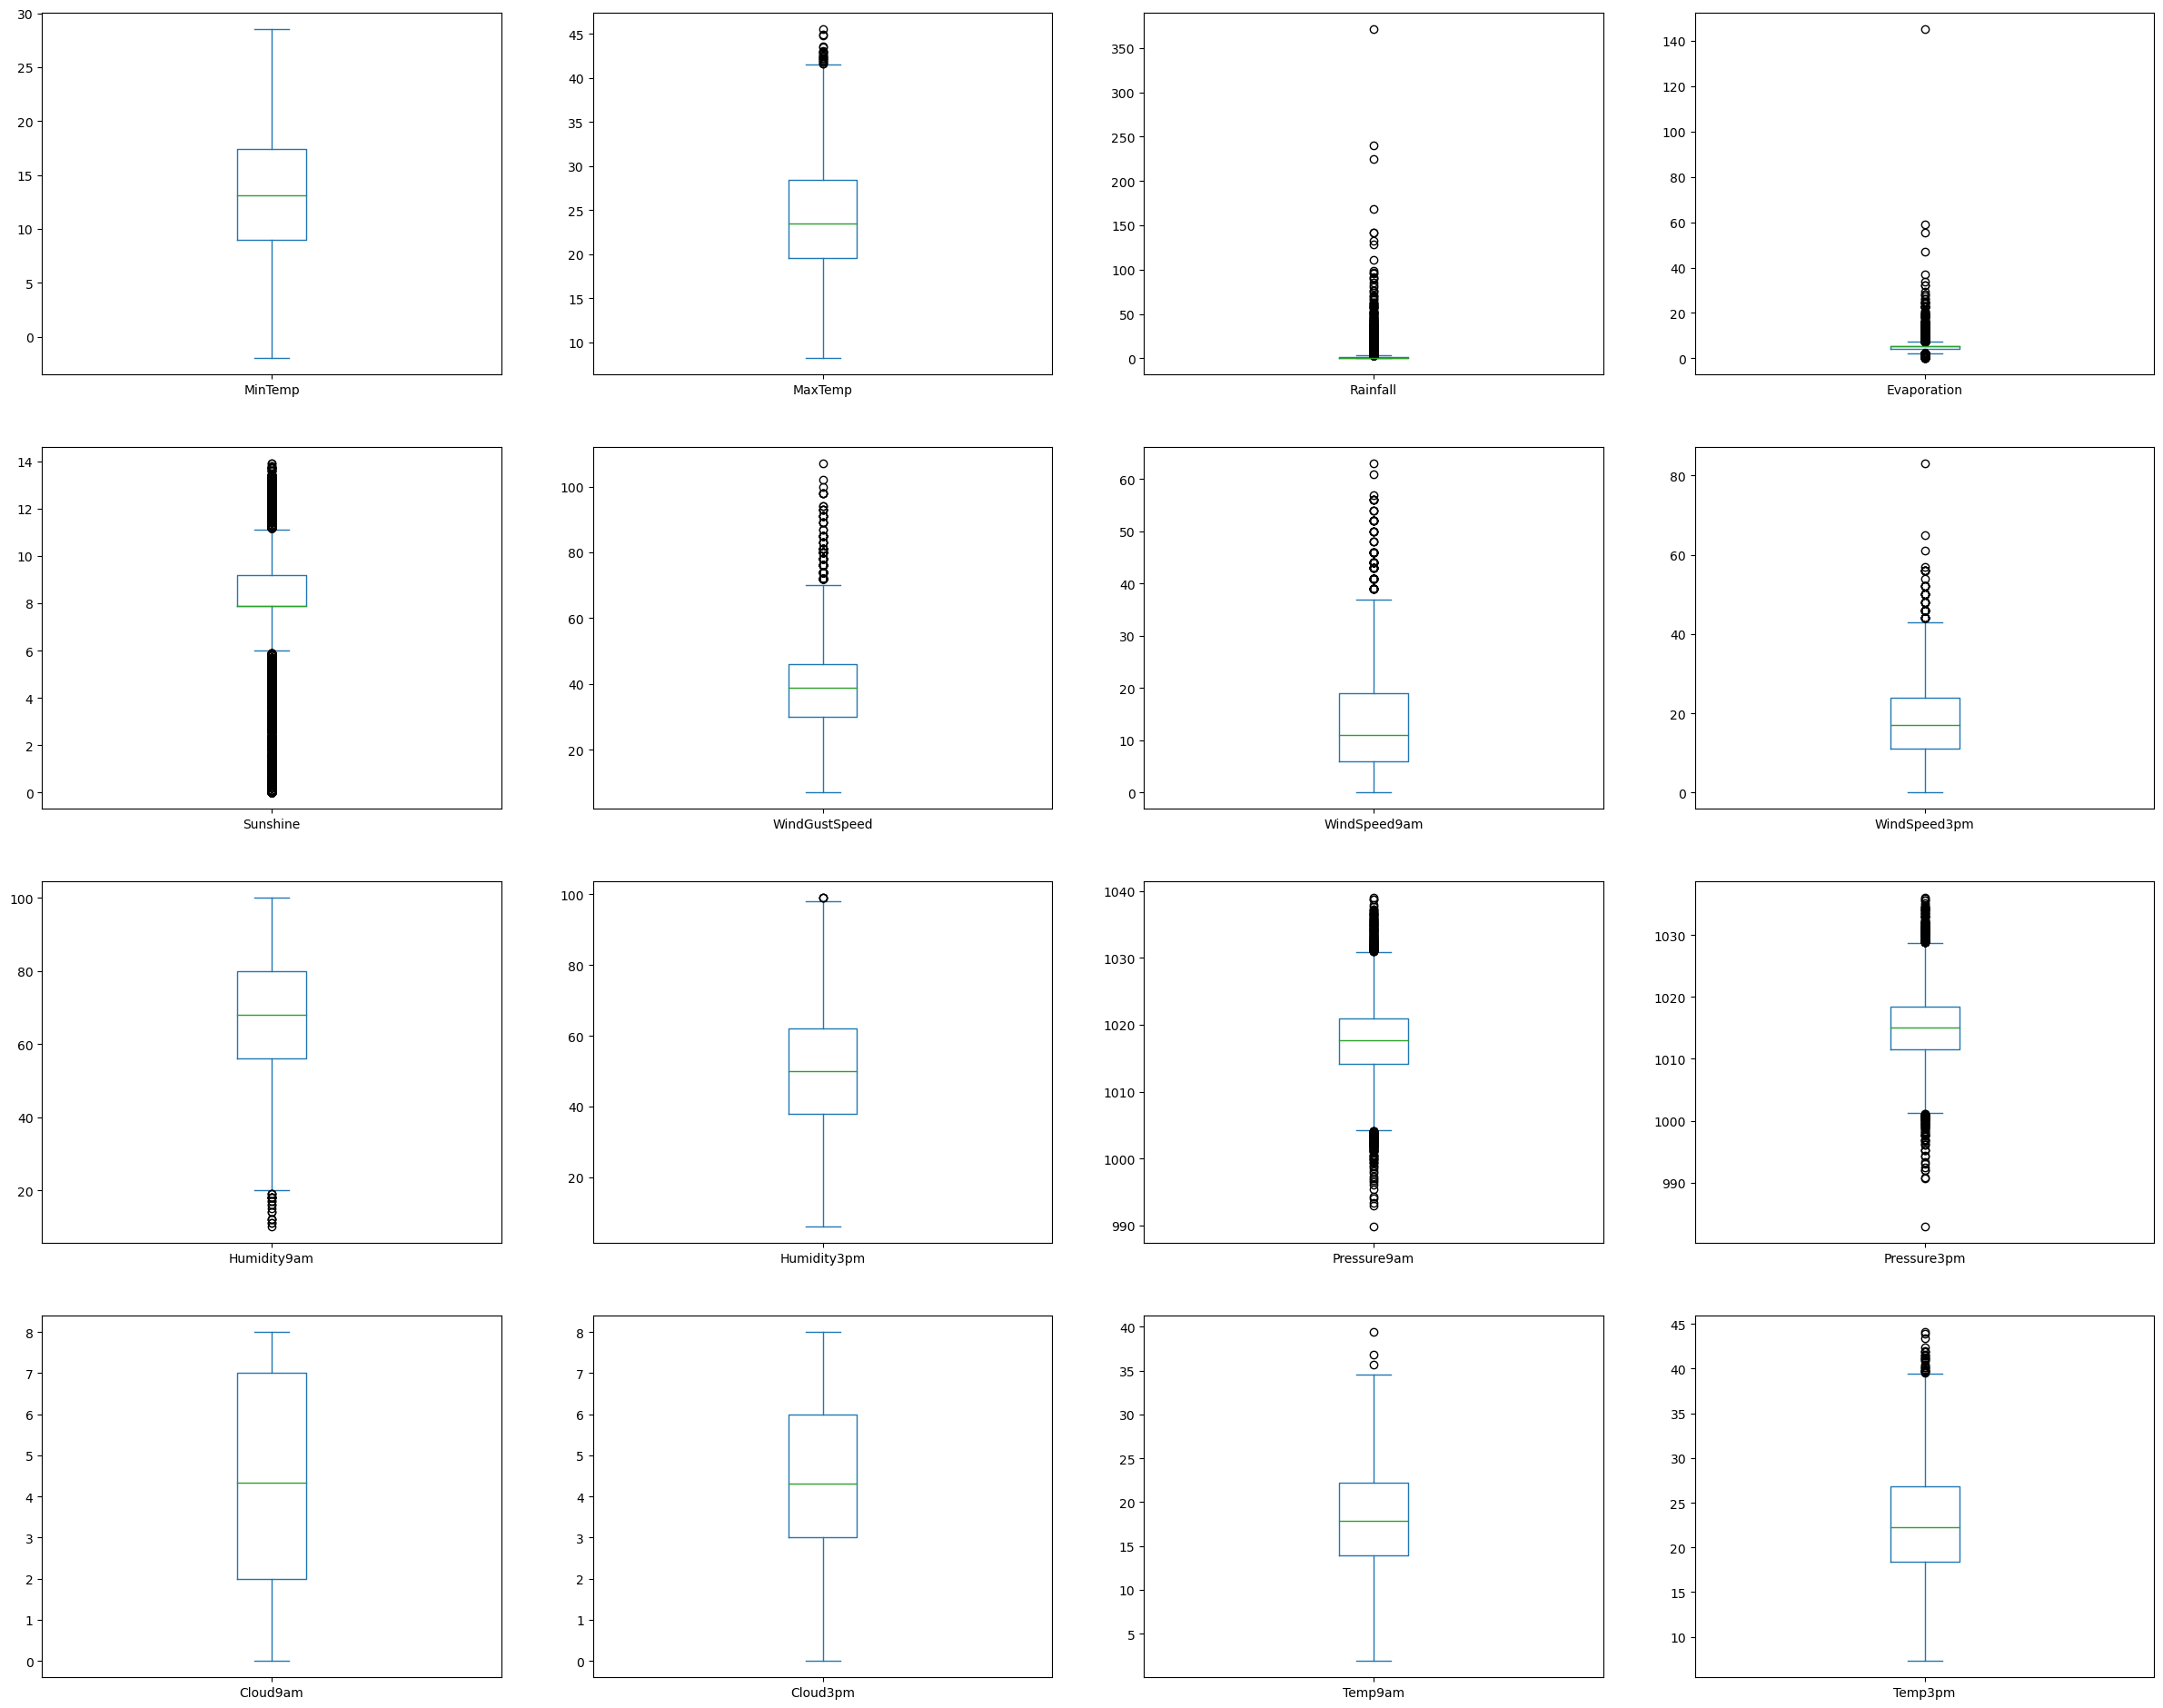

In [242]:
df_rain[num_cols].plot(kind='box',subplots=True,layout=(5,4),figsize=(30,30))
plt.show()

- We can see outliers in columns:'MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am',
'WindSpeed3pm','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am'

### Bivariate Analysis

<AxesSubplot:xlabel='Year', ylabel='MinTemp'>

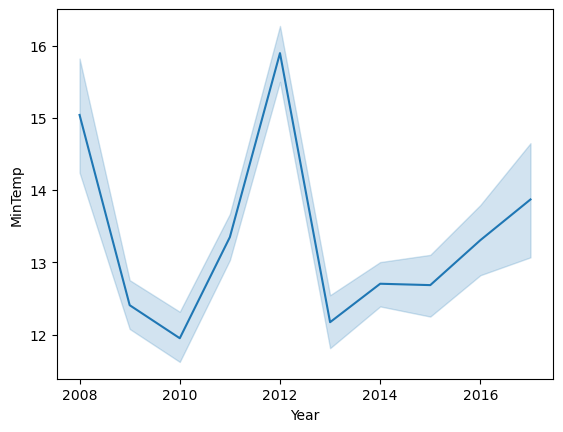

In [243]:
# Checking relationship between Year and Minimum Temperature recorded
sns.lineplot(x='Year',y='MinTemp', data=df_rain)

- We can see min temperature keeps fluctating over years

<AxesSubplot:xlabel='Year', ylabel='MaxTemp'>

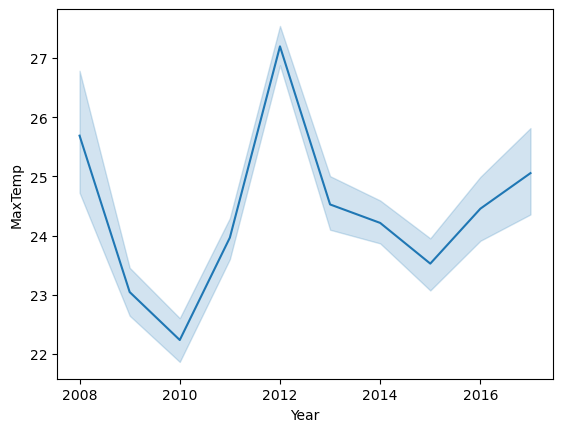

In [244]:
# Checking relationship between Year and Maximum Temperature recorded
sns.lineplot(x='Year',y='MaxTemp', data=df_rain)

- The max tempertaure above 27 degrees is observed in year 2012, otherwise the max temperature Australia is generally below 25 degrees

<AxesSubplot:xlabel='Year', ylabel='Rainfall'>

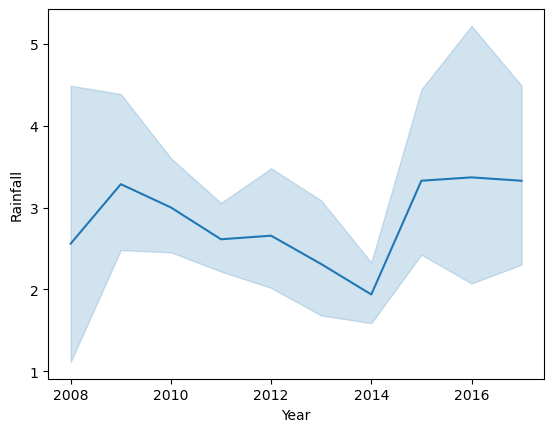

In [245]:
# Checking relationship between Year and Rainfall recorded
sns.lineplot(x='Year',y='Rainfall', data=df_rain)

- The rainfall in Australia is generally above 2.5mm, except for year 2014, where it went to 2 mm

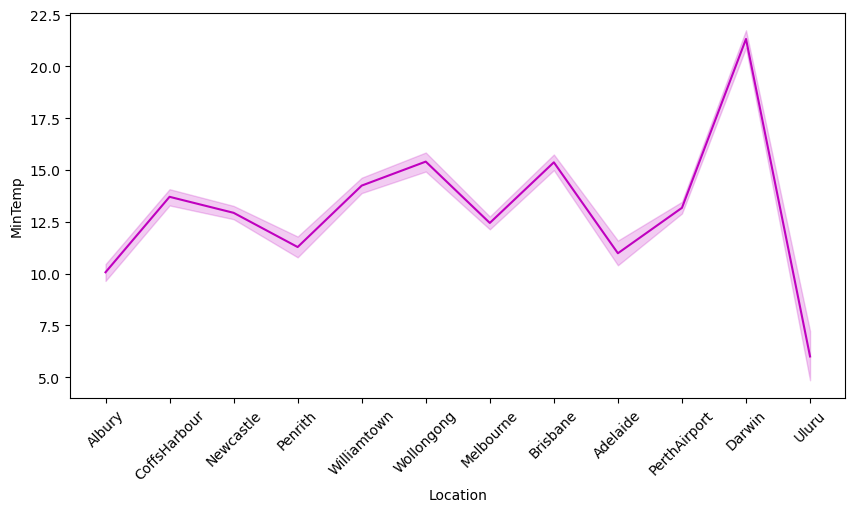

In [246]:
# Checking relationship between Location and MinTemp
plt.figure(figsize=(10,5))
sns.lineplot(x='Location',y='MinTemp', data=df_rain,color='m')
plt.xticks(rotation=45)
plt.show()

- We can see the lowest mintemp has been recorded for the location, 'Uluru' and the mintemp is highest for location 'Darwin'

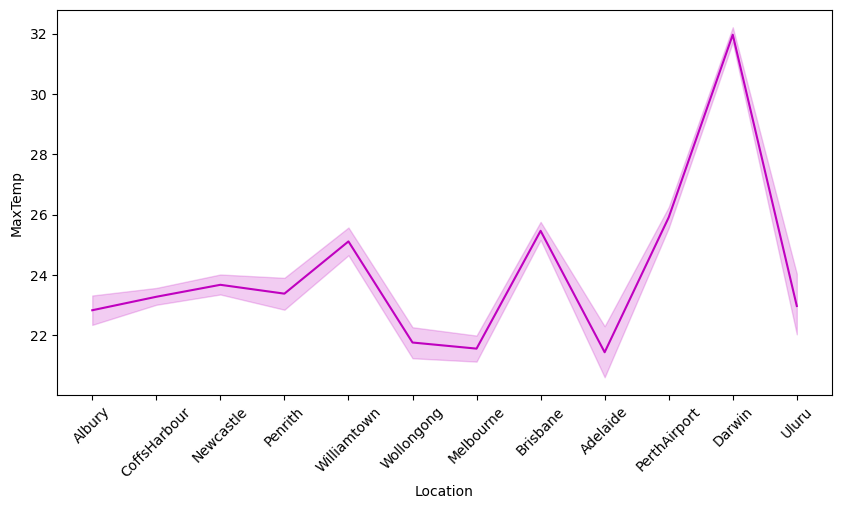

In [247]:
# Checking relationship between Location and MaxTemp
plt.figure(figsize=(10,5))
sns.lineplot(x='Location',y='MaxTemp', data=df_rain,color='m')
plt.xticks(rotation=45)
plt.show()

- We can see the lowest maxtemp has been recorded for the location,'Wollongong','Melbourne' and 'Adelaide' and the maxtemp is highest for location 'Darwin'

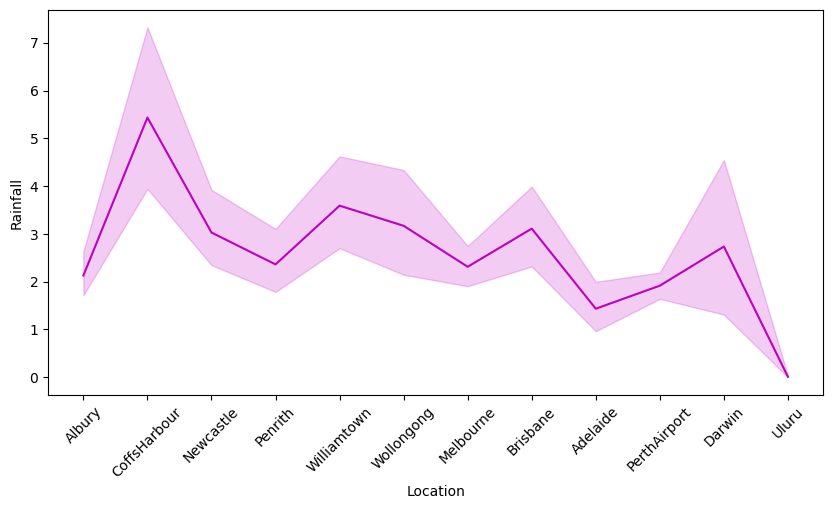

In [248]:
# Checking relationship between Location and Rainfall
plt.figure(figsize=(10,5))
sns.lineplot(x='Location',y='Rainfall', data=df_rain,color='m')
plt.xticks(rotation=45)
plt.show()

- We can observe maximum rainfall in mm for 'CoffsHarbour' and the least rainfall in 'Uluru'

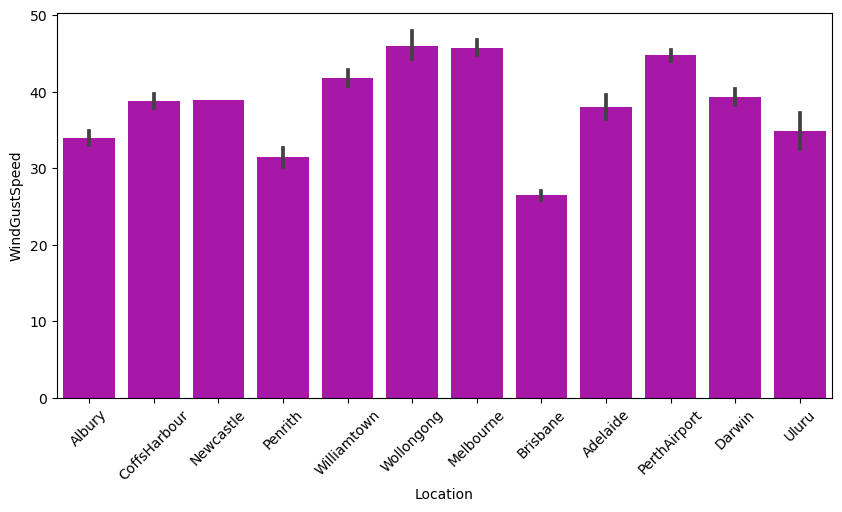

In [249]:
# Checking relationship between Location and WindGustSpeed
plt.figure(figsize=(10,5))
sns.barplot(x='Location',y='WindGustSpeed', data=df_rain,color='m')
plt.xticks(rotation=45)
plt.show()

- The maximum WindGustSpeed is recorded for the location 'Wollongong', and 'Melbourne' and minimum for the loaction, 'Brisbane'

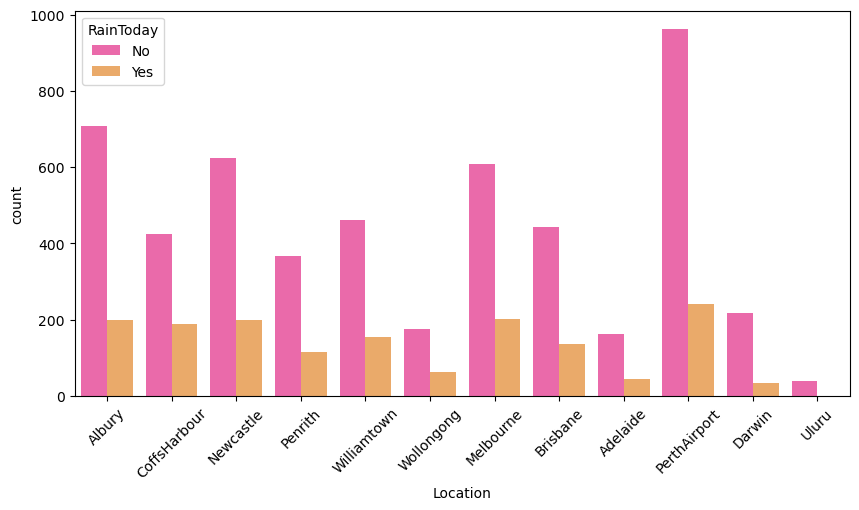

In [250]:
# Checking relationship between Location and RainToday
plt.figure(figsize=(10,5))
sns.countplot(x='Location', hue='RainToday', data=df_rain,palette='spring')
plt.xticks(rotation=45)
plt.show()

- We can see out of the total number observation recorded, chances of Rainfall are max for 'PerthAirport' and no rainfall is recorded for 'Uluru'

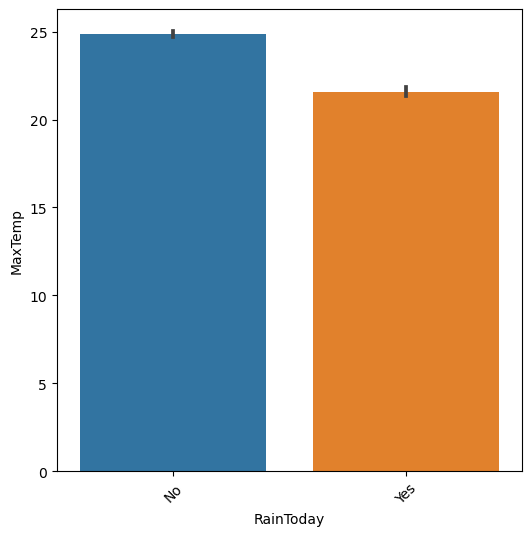

In [251]:
# Checking relationship between RainToday and MaxTemp
plt.figure(figsize=(6,6))
sns.barplot(x='RainToday',y='MaxTemp', data=df_rain)
plt.xticks(rotation=45)
plt.show()

- We can see chancess of rainfall occurance is yes when the max temp is 22 or below it, but if the temperature exceeds 22 degreess chances of rainfall occurence is no

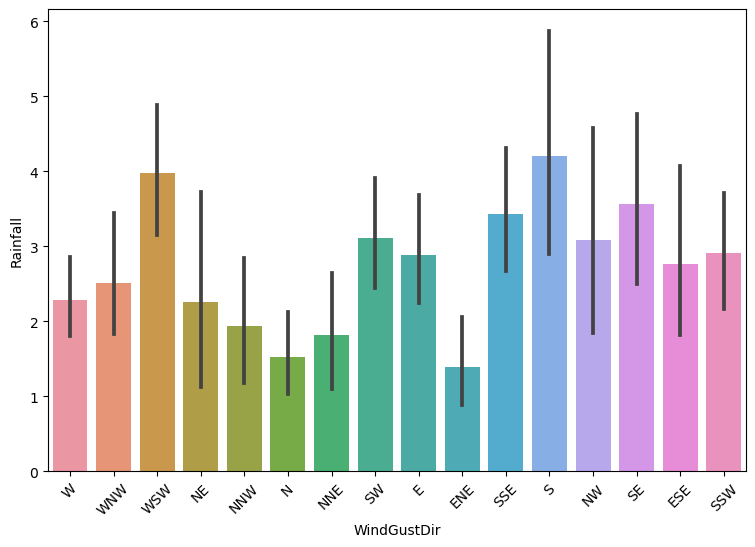

In [252]:
# Checking relationship between WindGustDir and Rainfall
plt.figure(figsize=(9,6))
sns.barplot(x='WindGustDir',y='Rainfall', data=df_rain)
plt.xticks(rotation=45)
plt.show()

- We can see when the WindGustDir is in South direction, maximum intensity of Rain is observed, followed by when it is in WestSouthWest and the lowest intensity of rain is observed when the direction is EastNorthEast

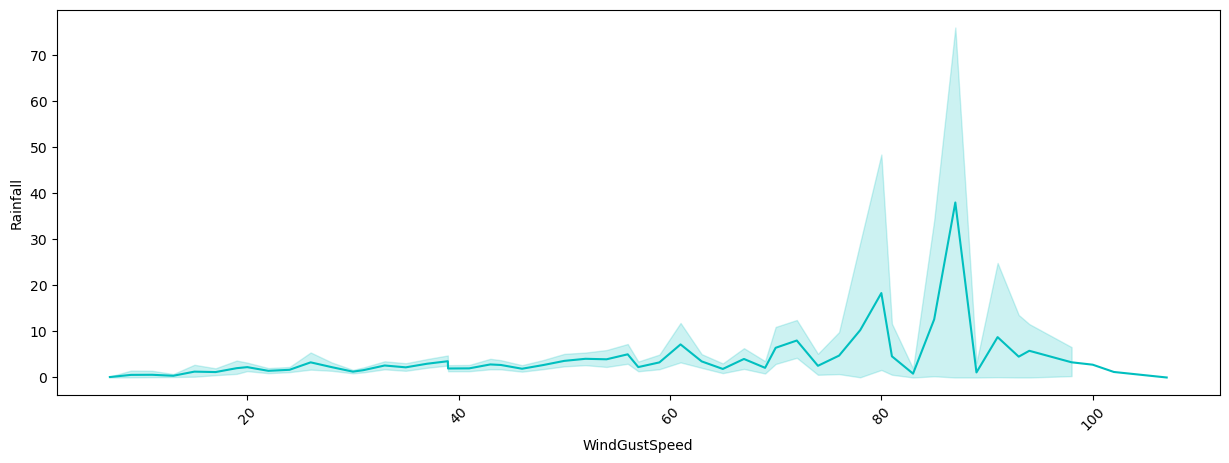

In [253]:
# Checking relationship between WindGustSpeed and Rainfall
plt.figure(figsize=(15,5))
sns.lineplot(x='WindGustSpeed',y='Rainfall', data=df_rain,color='c')
plt.xticks(rotation=45)
plt.show()

- We can observe with the increase in WindGustSpeed, intensity of Rainfall also increases

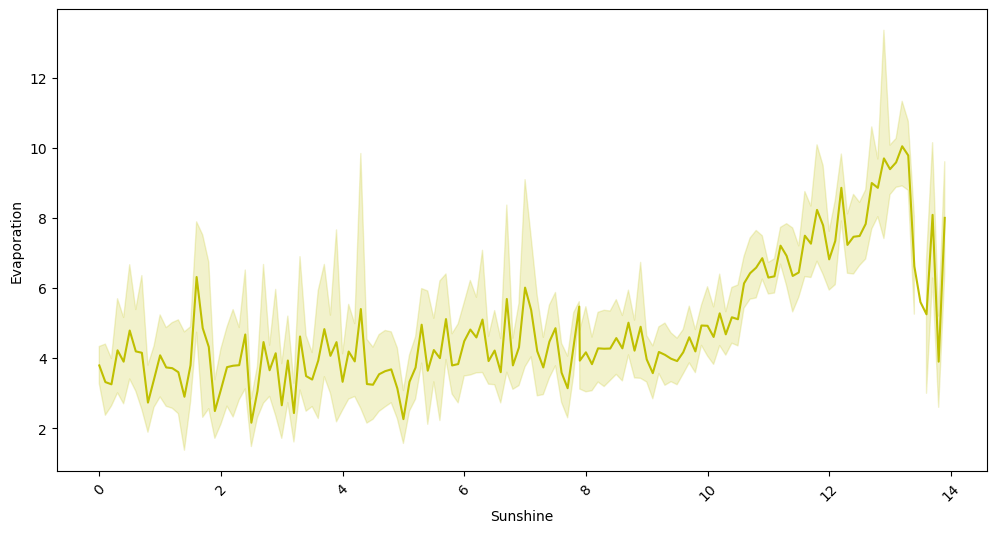

In [254]:
# Checking relationship between Sunshine and Evaporation
plt.figure(figsize=(12,6))
sns.lineplot(x='Sunshine',y='Evaporation', data=df_rain,color='y')
plt.xticks(rotation=45)
plt.show()

- We can see with the increase intensity of sunshine, evaporation increses too

## Label Encoding

In [255]:
from sklearn.preprocessing import LabelEncoder

In [256]:
for col in df_rain[cat_cols[1:]]:   # range starting from 1 as we deleted Date column previously
    le = LabelEncoder()
    df_rain[col] = le.fit_transform(df_rain[col])

In [257]:
df_rain.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,22.9,0.6,5.302395,7.890896,13,44.0,13,14,...,1007.1,8.000000,4.320988,16.9,21.8,0,0,1,12,2008
1,1,7.4,25.1,0.0,5.302395,7.890896,14,44.0,6,15,...,1007.8,4.336806,4.320988,17.2,24.3,0,0,2,12,2008
2,1,12.9,25.7,0.0,5.302395,7.890896,15,46.0,13,15,...,1008.7,4.336806,2.000000,21.0,23.2,0,0,3,12,2008
3,1,9.2,28.0,0.0,5.302395,7.890896,4,24.0,9,0,...,1012.8,4.336806,4.320988,18.1,26.5,0,0,4,12,2008
4,1,17.5,32.3,1.0,5.302395,7.890896,13,41.0,1,7,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,5,12,2008


Obs- We can see all the categorical columns are been encoded with numerical values

## Checking Correlation

In [258]:
df_rain.corr()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
Location,1.000000,0.090425,0.070878,-0.003504,0.137894,0.065573,-0.086385,0.260031,-0.088884,-0.001275,...,-0.024508,-0.008566,-0.010776,0.098533,0.066331,-0.004280,-0.004506,-0.000710,-0.067376,0.503047
MinTemp,0.090425,1.000000,0.728065,0.092371,0.269812,0.039286,-0.136250,0.242738,-0.020766,-0.139552,...,-0.440363,0.095403,0.047495,0.891425,0.696419,0.075933,0.097146,0.014344,-0.237177,0.032873
MaxTemp,0.070878,0.728065,1.000000,-0.087657,0.347231,0.355675,-0.195924,0.165528,-0.192684,-0.160967,...,-0.413150,-0.245116,-0.241542,0.866584,0.974695,-0.225749,-0.160318,0.016066,-0.171928,0.081622
Rainfall,-0.003504,0.092371,-0.087657,1.000000,-0.000755,-0.191656,0.027810,0.089987,0.091662,0.032052,...,-0.034081,0.196189,0.162653,-0.004172,-0.091987,0.459163,0.224213,-0.008658,-0.012896,-0.006992
Evaporation,0.137894,0.269812,0.347231,-0.000755,1.000000,0.266157,-0.091889,0.163857,-0.082329,-0.036871,...,-0.216711,-0.074490,-0.121875,0.317396,0.340045,-0.112552,-0.076733,0.009875,-0.008220,0.139220
Sunshine,0.065573,0.039286,0.355675,-0.191656,0.266157,1.000000,-0.099108,0.007625,-0.082495,-0.053334,...,-0.058151,-0.542442,-0.562537,0.236174,0.374244,-0.256123,-0.345509,0.001598,-0.004996,0.066165
WindGustDir,-0.086385,-0.136250,-0.195924,0.027810,-0.091889,-0.099108,1.000000,0.010034,0.378772,0.455305,...,-0.024369,0.115171,0.078248,-0.153232,-0.209048,0.112410,0.045179,0.013606,0.032066,-0.174132
WindGustSpeed,0.260031,0.242738,0.165528,0.089987,0.163857,0.007625,0.010034,1.000000,-0.071934,0.078165,...,-0.363104,0.013532,0.058182,0.221725,0.129756,0.085806,0.184435,-0.003225,0.049739,-0.028152
WindDir9am,-0.088884,-0.020766,-0.192684,0.091662,-0.082329,-0.082495,0.378772,-0.071934,1.000000,0.216648,...,0.051694,0.079312,0.058119,-0.071087,-0.201267,0.157884,0.040399,-0.014730,0.019799,-0.062314
WindDir3pm,-0.001275,-0.139552,-0.160967,0.032052,-0.036871,-0.053334,0.455305,0.078165,0.216648,1.000000,...,-0.049330,0.070565,0.050584,-0.146456,-0.174885,0.094507,0.004301,0.001723,0.034494,0.010694


<AxesSubplot:>

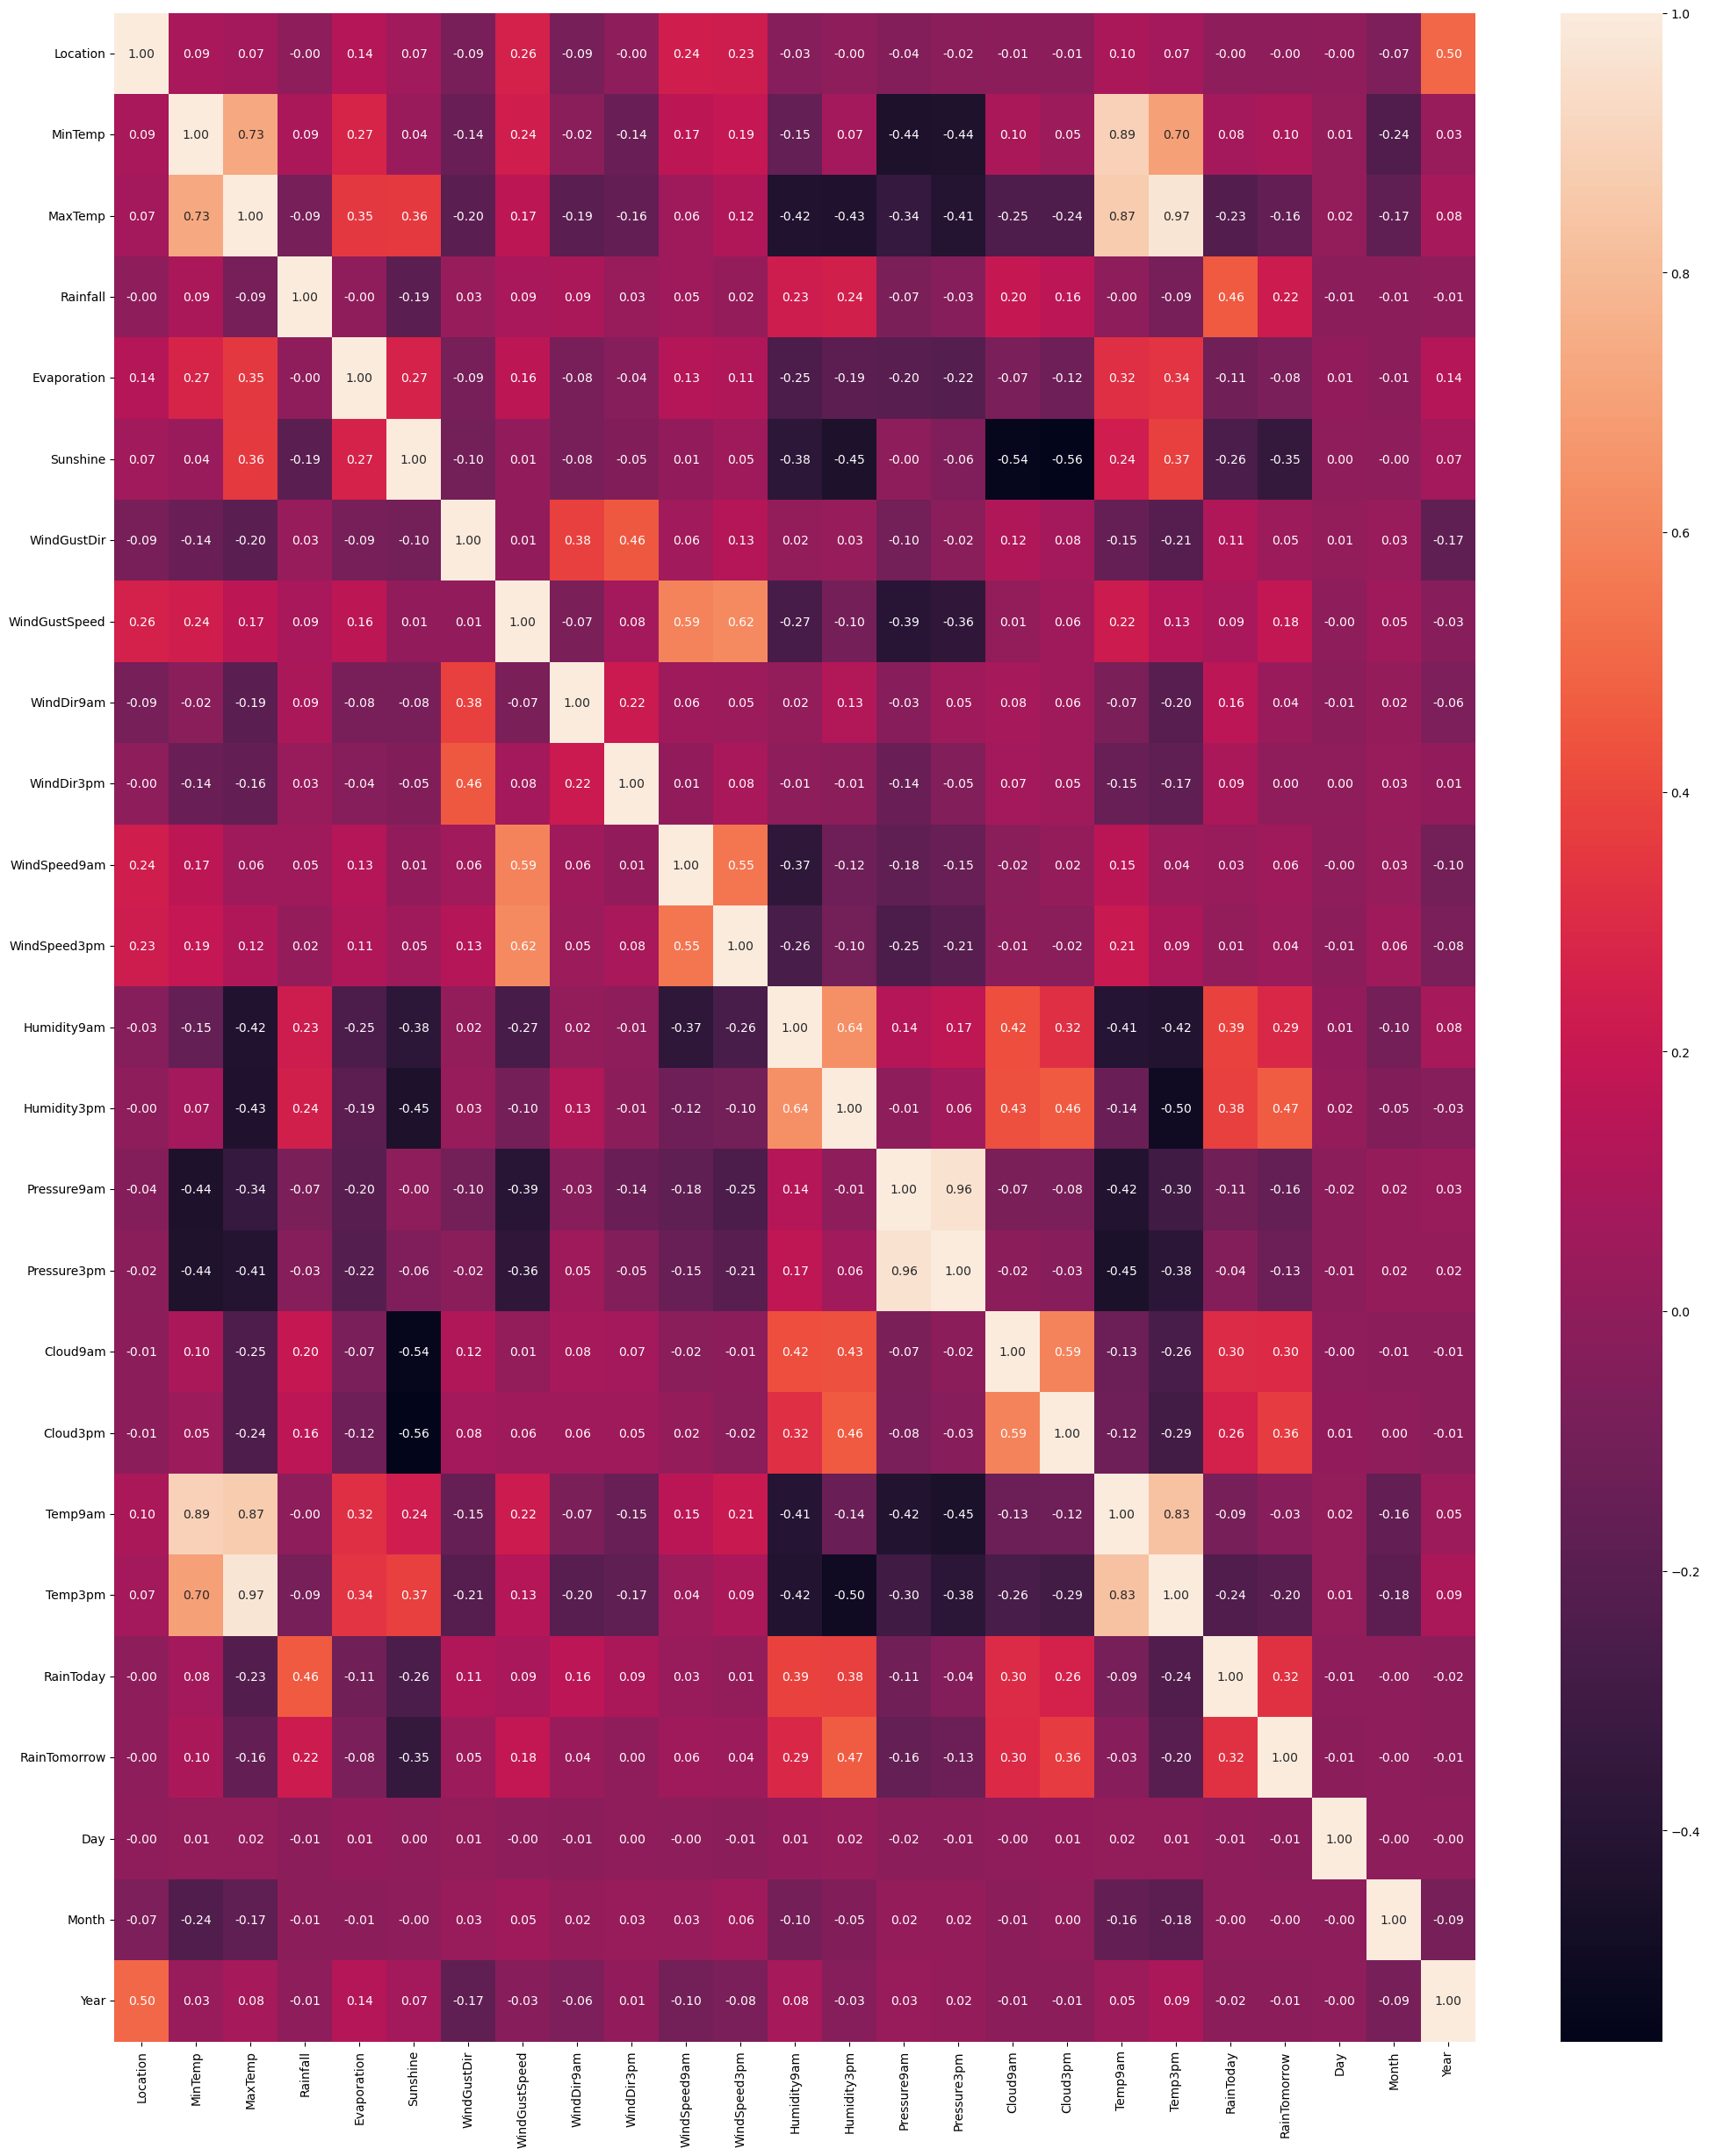

In [259]:
# Correlation using heatmap
plt.figure(figsize=(25,30))
sns.heatmap(df_rain.corr(),annot=True,fmt='0.2f')



* Highly positive correlated columns(>=0.7):('MinTemp and MaxTemp'),('MinTemp and Temp9am and Temp3pm'),('MaxTemp and Temp9am and Temp3pm'),('Rainfall and RainToday'),('Pressure9am and Pressure3pm')
* Positive correlated columns(>=0.4):('Location and Year'),('WindGustDir and Wind3pm'),('Wind and WindGustspeed 9am and 3pm'),('RainTomorrow and Humidity3pm')
* Highly negative correlated columns(>=-0.4):('MinTemp and Pressure9am and Pressure3pm'),('MaxTemp and Humidity9am and Humidity3pm'),('Sunshine and Cloud9am'),('Sunshine and Cloud3pm')
* Negative correlated columns(>-0.2):('Sunshine and Humidity3pm'),('WindGustspeed 9am and 3pm and Pressure 9am and 3pm'),('WindGustspeed 9am and 3pm and Temp 9am and 3pm')
 * We can also predict that multi-collinearity is present between (MinTemp and MaxTemp') and ('Temp9am and Temp3pm') and ('Pressure9am and Pressure3pm'), thus would be checking it through VIF and removing it later.

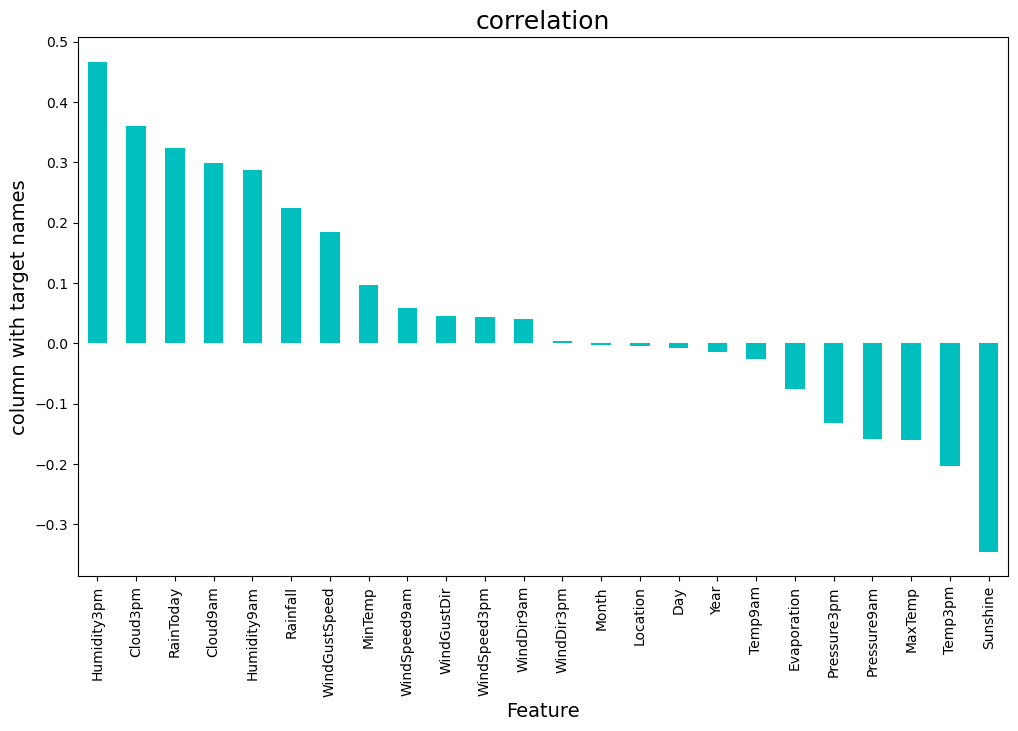

In [260]:
# Correlation of features with Target Column a)RainTomorrow
plt.figure(figsize=(12,7))
df_rain.corr()['RainTomorrow'].sort_values(ascending=False).drop(['RainTomorrow']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

- The most positive correlated column for RainTomorrow is Humidity3pm and Cloud3pm, negative correlated are Sunshine and Temp3pm  and the least are 'Month','Location'

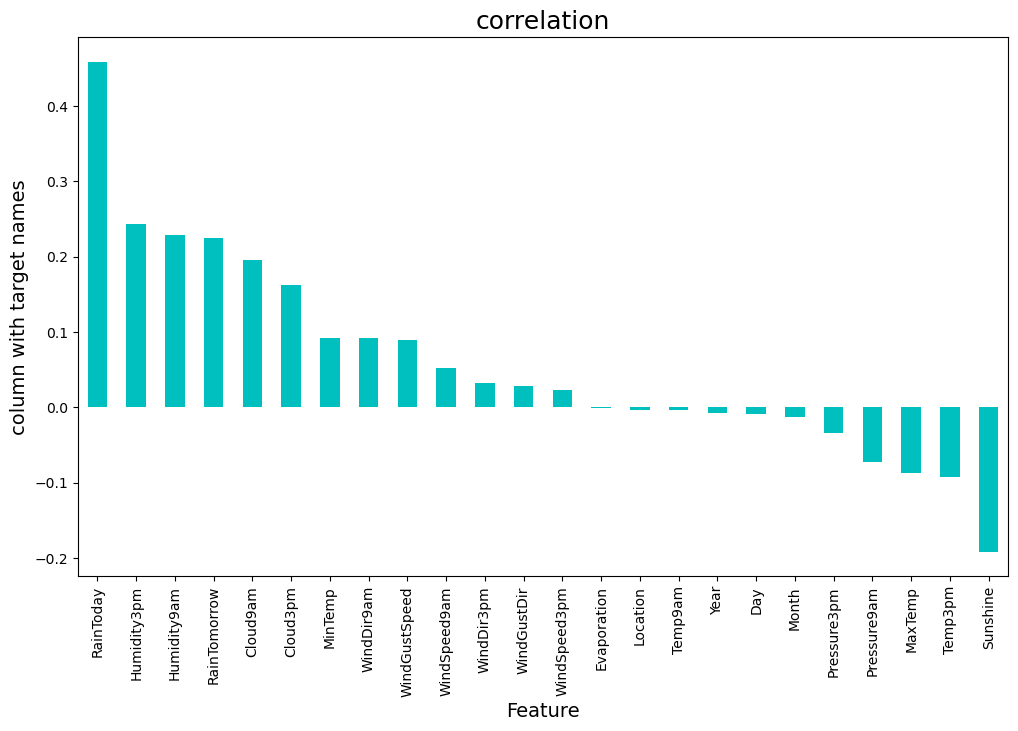

In [261]:
# Correlation of features with Target Column b)Rainfall
plt.figure(figsize=(12,7))
df_rain.corr()['Rainfall'].sort_values(ascending=False).drop(['Rainfall']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

- The most positive correlated column for RainTomorrow is RainToday Humidity3pm and 9am, negative correlated are Sunshine and Temp3pm  and the least are 'Evaporation','Location'

## Detecting Outliers and Treating them

In [262]:
# Using Z-Score method
from scipy.stats import zscore
z=np.abs(zscore(df_rain[num_cols])) # detecting only numerical cols
threshold=3

In [263]:
df_rain_new=df_rain[num_cols][(z<3).all(axis=1)]

In [264]:
print("df_rain_new.shape:",df_rain_new.shape)

df_rain_new.shape: (6409, 16)


In [265]:
dropindx = df_rain.index.difference(df_rain_new.index)

In [266]:
dropindx

Int64Index([   8,   12,   44,   52,   60,   61,   62,   67,   68,  123,
            ...
            7873, 7983, 7984, 8024, 8054, 8100, 8136, 8144, 8145, 8185],
           dtype='int64', length=353)

In [267]:
df_rain.drop(dropindx,inplace = True) #dropping the outliers from original features Dataframe

In [268]:
df_rain.reset_index(drop=True,inplace = True)

In [269]:
df_rain.shape

(6409, 25)

## Model Building

## (Approach 1: 'Classification Model to find whether or not it will rain tomorrow. )

### Data Preprocessing

### Seperating Input and Target variables

In [270]:
x=df_rain.drop(columns='RainTomorrow')
y=df_rain['RainTomorrow']

In [271]:
x.shape

(6409, 24)

In [272]:
y.shape

(6409,)

### Data Transformation to treat Skewness

#### Checking Skewness

In [273]:
x[num_cols].skew()

MinTemp         -0.079107
MaxTemp          0.265797
Rainfall         3.515410
Evaporation      0.721400
Sunshine        -0.890629
WindGustSpeed    0.477235
WindSpeed9am     0.677433
WindSpeed3pm     0.341549
Humidity9am     -0.233044
Humidity3pm      0.158509
Pressure9am      0.064023
Pressure3pm      0.090093
Cloud9am        -0.203578
Cloud3pm        -0.147217
Temp9am         -0.072513
Temp3pm          0.290192
dtype: float64

- keeping the acceptable range +/- 0.5, we can see skewness is present in columns 'Rainfall','Evaporation','Sunshine', WindSpeed9am'



#### Applying Transformation Method
Applying transformation method to treat the skewness

In [274]:
x=pd.DataFrame(x)
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer() 
skew_col = ['Rainfall','Sunshine','Evaporation','WindSpeed9am']
x[skew_col]= pt.fit_transform(x[skew_col].values)

In [275]:
# Rechecking the skewness
x[num_cols].skew()

MinTemp         -0.079107
MaxTemp          0.265797
Rainfall         0.970931
Evaporation      0.071784
Sunshine        -0.054513
WindGustSpeed    0.477235
WindSpeed9am    -0.132158
WindSpeed3pm     0.341549
Humidity9am     -0.233044
Humidity3pm      0.158509
Pressure9am      0.064023
Pressure3pm      0.090093
Cloud9am        -0.203578
Cloud3pm        -0.147217
Temp9am         -0.072513
Temp3pm          0.290192
dtype: float64

- We can see the except for 'Rainfall', Skewness has gone from all th columns.

### Data Scaling

In [276]:



from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Day,Month,Year
0,-1.391396,0.069172,-0.190821,0.685674,0.155534,-0.118386,1.222524,0.483303,1.317076,1.373685,...,-1.759834,-1.436942,1.495570,0.017600,-0.162690,-0.149628,-0.535675,-1.672284,1.655296,-1.770498
1,-1.391396,-1.013829,0.174339,-0.674943,0.155534,-0.118386,1.413467,0.483303,-0.222676,1.596977,...,-1.252796,-1.313436,0.014663,0.017600,-0.109936,0.276421,-0.535675,-1.558519,1.655296,-1.770498
2,-1.391396,-0.021078,0.273928,-0.674943,0.155534,-0.118386,1.604410,0.646634,1.317076,1.596977,...,-1.777318,-1.154643,0.014663,-0.982885,0.558287,0.088960,-0.535675,-1.444754,1.655296,-1.770498
3,-1.391396,-0.688929,0.655685,-0.674943,0.155534,-0.118386,-0.495963,-1.149999,0.437218,-1.752399,...,-0.028909,-0.431253,0.014663,0.017600,0.048327,0.651345,-0.535675,-1.330989,1.655296,-1.770498
4,-1.391396,0.809223,1.369406,1.045503,0.155534,-0.118386,1.222524,0.238308,-1.322499,-0.189357,...,-1.217827,-1.631022,1.091303,1.603475,-0.004427,1.196689,-0.535675,-1.217224,1.655296,-1.770498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6404,1.203340,-1.844130,-0.107830,-0.674943,0.155534,-0.118386,-1.259735,-0.578343,0.437218,-1.529108,...,1.194978,0.892021,0.014663,0.017600,-1.358458,-0.047376,-0.535675,0.603012,-0.134362,2.169323
6405,1.203340,-1.699730,0.207535,-0.674943,0.155534,-0.118386,-0.114077,-1.313329,0.437218,-1.082524,...,1.002652,0.680297,0.014663,0.017600,-1.217780,0.310505,-0.535675,0.716777,-0.134362,2.169323
6406,1.203340,-1.374830,0.473105,-0.674943,0.155534,-0.118386,-0.686906,-0.088352,0.437218,1.373685,...,0.565550,0.274493,0.014663,0.017600,-0.936423,0.583177,-0.535675,0.830541,-0.134362,2.169323
6407,1.203340,-0.941629,0.489704,-0.674943,0.155534,-0.118386,0.458752,-0.823338,0.657182,-1.082524,...,0.285805,0.221562,-0.525762,-0.982885,-0.479217,0.566135,-0.535675,0.944306,-0.134362,2.169323


### Checking Multi-Collinearity

In [277]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [278]:


from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.651813,Location
1,9.322934,MinTemp
2,26.308421,MaxTemp
3,5.371374,Rainfall
4,1.654211,Evaporation
5,2.164338,Sunshine
6,1.586956,WindGustDir
7,2.183453,WindGustSpeed
8,1.347938,WindDir9am
9,1.421436,WindDir3pm


- Keeping the acceptable range as below or equal 10, we observe the VIF of 'MaxTemp','Pressure9am', 'Pressure3pm','Temp9am','Temp3pm' is high


- Deleting the columns 'Temp9am' and 'Temp3pm' as they have high VIF and also they have strong correlation with mintemp and maxtemp 

In [279]:
x.drop('Temp9am', axis =1, inplace=True) # Dropping 'Temp9am' column

In [280]:
x.drop('Temp3pm', axis =1, inplace=True) # Dropping 'Temp3pm' column

In [281]:
x.shape

(6409, 22)

In [282]:
# Rechecking the VIF
vif_cal()

    VIF Factor       Features
0     1.649227       Location
1     4.986941        MinTemp
2     5.875642        MaxTemp
3     5.365353       Rainfall
4     1.633147    Evaporation
5     2.132740       Sunshine
6     1.581033    WindGustDir
7     2.134908  WindGustSpeed
8     1.346094     WindDir9am
9     1.420347     WindDir3pm
10    1.996837   WindSpeed9am
11    1.914162   WindSpeed3pm
12    2.640205    Humidity9am
13    2.950119    Humidity3pm
14   19.792116    Pressure9am
15   19.079428    Pressure3pm
16    2.001206       Cloud9am
17    1.909670       Cloud3pm
18    4.851143      RainToday
19    1.004756            Day
20    1.119846          Month
21    1.579621           Year


- We can see VIF of columns 'Pressure9am', 'Pressure3pm', is still high, so deleting 'Pressure9am' and 'Pressure3pm' columns to reduce multicollinearity

In [283]:
x.drop('Pressure9am', axis =1, inplace=True) # Dropping 'Pressure9am' column


In [284]:
x.drop('Pressure3pm', axis =1, inplace=True) # Dropping 'Pressure9am' column

In [285]:
x.shape

(6409, 20)

In [286]:
# Rechecking the VIF
vif_cal()

    VIF Factor       Features
0     1.640303       Location
1     4.777643        MinTemp
2     5.510428        MaxTemp
3     5.327154       Rainfall
4     1.593580    Evaporation
5     2.121812       Sunshine
6     1.557096    WindGustDir
7     2.009725  WindGustSpeed
8     1.319698     WindDir9am
9     1.345816     WindDir3pm
10    1.984148   WindSpeed9am
11    1.898757   WindSpeed3pm
12    2.637675    Humidity9am
13    2.941030    Humidity3pm
14    1.999211       Cloud9am
15    1.908008       Cloud3pm
16    4.850538      RainToday
17    1.003606            Day
18    1.115793          Month
19    1.577053           Year


- We can see no multicollinearity in the data now

### Checking for Imbalance

In [287]:
print(y.value_counts())

0    4979
1    1430
Name: RainTomorrow, dtype: int64


Obs- We can see the data is imbalanced, balancing it using Oversampling below

### Oversampling using SMOTE

In [288]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y= SM.fit_resample(x,y)

In [289]:
print(y.value_counts())

0    4979
1    4979
Name: RainTomorrow, dtype: int64


### Data Modelling(Classification Model)

In [290]:
# Finding best Random State

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    lg = LogisticRegression()
    lg.fit(x_train, y_train)
    predlg = lg.predict(x_test)
    acc=accuracy_score(y_test, predlg)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8058902275769746  on Random_state  127


#### Splitting data into Train-Test

In [291]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

In [292]:
x_train.shape

(6970, 20)

In [293]:
y_train.shape

(6970,)

In [294]:
x_test.shape

(2988, 20)

In [295]:
y_test.shape

(2988,)

### Using various Machine Learning Algorithms

In [296]:
#importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#### 1. Logistic Regression

In [297]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predlg))
print("Confusion Matrix:\n",confusion_matrix(y_test,predlg))
print("Classification Report:\n",classification_report(y_test,predlg))

Accuracy: 0.8058902275769746
Confusion Matrix:
 [[1200  268]
 [ 312 1208]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.81      1468
           1       0.82      0.79      0.81      1520

    accuracy                           0.81      2988
   macro avg       0.81      0.81      0.81      2988
weighted avg       0.81      0.81      0.81      2988



Obs- The Logistic Regression has provided the accuracy_score:0.80 and f1-score:0.81

#### 2. GaussianNB

In [303]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predgnb))
print("Confusion Matrix:\n",confusion_matrix(y_test,predgnb))
print("Classification Report:\n",classification_report(y_test,predgnb))

Accuracy: 0.7630522088353414
Confusion Matrix:
 [[1127  341]
 [ 367 1153]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.77      0.76      1468
           1       0.77      0.76      0.77      1520

    accuracy                           0.76      2988
   macro avg       0.76      0.76      0.76      2988
weighted avg       0.76      0.76      0.76      2988



- The GaussianNB has provided the accuracy_score: 0.76 and f1-score:0.76

#### 3.Decision Tree Classifier

In [304]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print("Accuracy:",accuracy_score(y_test,preddtc))
print("Confusion Matrix:\n",confusion_matrix(y_test,preddtc))
print("Classification Report:\n",classification_report(y_test,preddtc))

Accuracy: 0.8236278447121821
Confusion Matrix:
 [[1193  275]
 [ 252 1268]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1468
           1       0.82      0.83      0.83      1520

    accuracy                           0.82      2988
   macro avg       0.82      0.82      0.82      2988
weighted avg       0.82      0.82      0.82      2988



- The Decision Tree Classifier has provided the accuracy-score:0.82 and f1-score:0.82

#### 4.K Nearest Neighbor Classifier

In [305]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predknn))
print("Confusion Matrix:\n",confusion_matrix(y_test,predknn))
print("Classification Report:\n",classification_report(y_test,predknn))

Accuracy: 0.8376840696117804
Confusion Matrix:
 [[1066  402]
 [  83 1437]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.73      0.81      1468
           1       0.78      0.95      0.86      1520

    accuracy                           0.84      2988
   macro avg       0.85      0.84      0.84      2988
weighted avg       0.85      0.84      0.84      2988



- The K Nearest Neighbor Classifier has provided the accuracy-score:0.83 and f1-score:0.84

#### 5.Support Vector Machine Classifier

In [306]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predsvc))
print("Confusion Matrix:\n",confusion_matrix(y_test,predsvc))
print("Classification Report:\n",classification_report(y_test,predsvc))

Accuracy: 0.8487282463186078
Confusion Matrix:
 [[1222  246]
 [ 206 1314]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84      1468
           1       0.84      0.86      0.85      1520

    accuracy                           0.85      2988
   macro avg       0.85      0.85      0.85      2988
weighted avg       0.85      0.85      0.85      2988



Obs- The Support Vector Machine Classifier has provided the accuracy-score:0.84 and f1-score:0.85

#### 6. Ensemble Methods
##### 6.1 Random Forest Classifier

In [307]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predrf))
print("Confusion Matrix:\n",confusion_matrix(y_test,predrf))
print("Classification Report:\n",classification_report(y_test,predrf))

Accuracy: 0.8992637215528781
Confusion Matrix:
 [[1307  161]
 [ 140 1380]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.90      1468
           1       0.90      0.91      0.90      1520

    accuracy                           0.90      2988
   macro avg       0.90      0.90      0.90      2988
weighted avg       0.90      0.90      0.90      2988



Obs- The Random Forest Classifier has provided the accuracy-score:0.89 and f1-score:0.90

##### 6.2 Ada Boost Classifier

In [308]:
ad=AdaBoostClassifier(n_estimators=50,learning_rate=1.0)
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predad))
print("Confusion Matrix:\n",confusion_matrix(y_test,predad))
print("Classification Report:\n",classification_report(y_test,predad))

Accuracy: 0.8333333333333334
Confusion Matrix:
 [[1221  247]
 [ 251 1269]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1468
           1       0.84      0.83      0.84      1520

    accuracy                           0.83      2988
   macro avg       0.83      0.83      0.83      2988
weighted avg       0.83      0.83      0.83      2988



- The Ada Boost Classifier has provided the accuracy-score:0.83 and f1-score:0.83

##### 6.3 Gradient Boosting Classifier

In [309]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predgb))
print("Confusion Matrix:\n",confusion_matrix(y_test,predgb))
print("Classification Report:\n",classification_report(y_test,predgb))

Accuracy: 0.8691432396251674
Confusion Matrix:
 [[1304  164]
 [ 227 1293]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1468
           1       0.89      0.85      0.87      1520

    accuracy                           0.87      2988
   macro avg       0.87      0.87      0.87      2988
weighted avg       0.87      0.87      0.87      2988



- The Gradient Boosting Classifier has provided the accuracy-score:0.86 and f1-score:0.87

### Cross Validation

In [310]:
from sklearn.model_selection import cross_val_score

In [313]:
# Using of K-Fold cross-validation technique

predlg= lg.predict(x_test)

from sklearn.model_selection import cross_val_score

test_accuracy= accuracy_score(y_test,predlg)

for j in range(5,11):
    cv_score=cross_val_score(lg,x,y,cv=j)
    cv_mean= cv_score.mean()
    print('At cv:',j)
    print('Cross_Validation_score is:',cv_mean*100)
    print('Accuracy is :',test_accuracy*100)
    print("\n")

At cv: 5
Cross_Validation_score is: 71.93367140082178
Accuracy is : 80.58902275769746


At cv: 6
Cross_Validation_score is: 71.54257778552426
Accuracy is : 80.58902275769746


At cv: 7
Cross_Validation_score is: 74.04279644198873
Accuracy is : 80.58902275769746


At cv: 8
Cross_Validation_score is: 72.57721400069732
Accuracy is : 80.58902275769746


At cv: 9
Cross_Validation_score is: 73.65050869047302
Accuracy is : 80.58902275769746


At cv: 10
Cross_Validation_score is: 73.60129967104598
Accuracy is : 80.58902275769746




- Selecting the fold value as 5

In [314]:
# cv score for Logistic Regression 
cvlg=cross_val_score(lg,x,y,cv=5).mean()
print('CV score  for Logistic Regression:',cvlg)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predlg)-cvlg)

CV score  for Logistic Regression: 0.7193367140082177
And Difference between CV and accuracy_score= 0.08655351356875685


In [315]:
# cv score for GaussianNB 
cvgnb=cross_val_score(gnb,x,y,cv=5).mean()
print('CV score  for Gaussian NB:',cvgnb)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predgnb)-cvgnb)

CV score  for Gaussian NB: 0.72033508216694
And Difference between CV and accuracy_score= 0.04271712666840144


In [316]:
# cv score for Decision Tree Classifier 
cvdtc=cross_val_score(dtc,x,y,cv=5).mean()
print('CV score  for Decision Tree Classifier:',cvdtc)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,preddtc)-cvdtc)

CV score  for Decision Tree Classifier: 0.6385026293017374
And Difference between CV and accuracy_score= 0.1851252154104447


In [317]:
# cv score for K Neighbors Classifier 
cvknn=cross_val_score(knn,x,y,cv=5).mean()
print('CV score  for K Neighbors Clssifier:',cvknn)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predknn)-cvknn)

CV score  for K Neighbors Clssifier: 0.684892558682747
And Difference between CV and accuracy_score= 0.15279151092903343


In [322]:
# cv score for Support Vector Machine Classifier 
cvsvc=cross_val_score(svc,x,y,cv=5).mean()
print('CV score  for Support Vector Classifier:',cvsvc)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predsvc)-cvsvc)

CV score  for Support Vector Classifier: 0.6998573903852476
And Difference between CV and accuracy_score= 0.14887085593336014


In [323]:
# cv score for Random Forest Classifier
cvrf=cross_val_score(rf,x,y,cv=5).mean()
print('CV score  for RandomForestClassifier:',cvrf)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predrf)-cvrf)

CV score  for RandomForestClassifier: 0.690327709633108
And Difference between CV and accuracy_score= 0.20893601191977018


In [324]:
# cv score for Ada Boost Classifier
cvad=cross_val_score(ad,x,y,cv=3).mean()
print('CV score  for Ada Boost Classifier:',cvad)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predad)-cvad)

CV score  for Ada Boost Classifier: 0.6206110370980759
And Difference between CV and accuracy_score= 0.2127222962352575


In [325]:
# cv score for GradientBoostingClassifier
cvgb=cross_val_score(gb,x,y,cv=3).mean()
print('CV score  for Gradienty Boosting Classifier:',cvgb)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predgb)-cvgb)

CV score  for Gradienty Boosting Classifier: 0.58255041860724
And Difference between CV and accuracy_score= 0.2865928210179274


- We can observe the difference between CV score and r2_score is least(0.04) in the model GaussianNB.

- Finding best parmeters for GaussianNB using hyper tuning below

### Hyper Parameter Tuning

In [326]:
gnb.get_params()

{'priors': None, 'var_smoothing': 1e-09}

As there is no much parameters that affect GaussianNB, we will treat the default GNB as our best model.

### Plotting ROC-AUC curve for best model

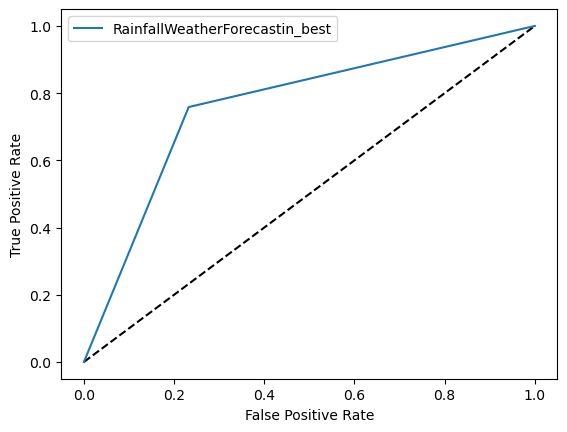

In [327]:
fpr,tpr,threshholds=roc_curve(y_test,predgnb)
auc = roc_auc_score(y_test,predgnb)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RainfallWeatherForecastin_best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Obs- The best model ie. GaussianNB Classifier has AUC(area under curve)=  75%

### Saving the best classification model

In [328]:
import joblib

joblib.dump(gnb,'RainTomorrow.obj')

['RainTomorrow.obj']

In [329]:
RainTomorrow_model=joblib.load('RainTomorrow.obj')

In [330]:
RainTomorrow_model

GaussianNB()

### Predicting the Output

In [331]:
ori = np.array(y_test)
predicted = np.array(RainTomorrow_model.predict(x_test))
df_new = pd.DataFrame({"Original":ori,"Predicted":predicted},index= range(len(ori)))
df_new.sample(10)

,Original,Predicted
1039,1,1
1340,0,0
2756,0,0
1221,1,1
2488,1,1
1614,1,1
2646,1,1
1375,1,1
599,0,0
2213,1,0


Obs- We can see our best model has given majorly the same results as original

Text(0.5, 1.0, 'Original vs predicted  graph')

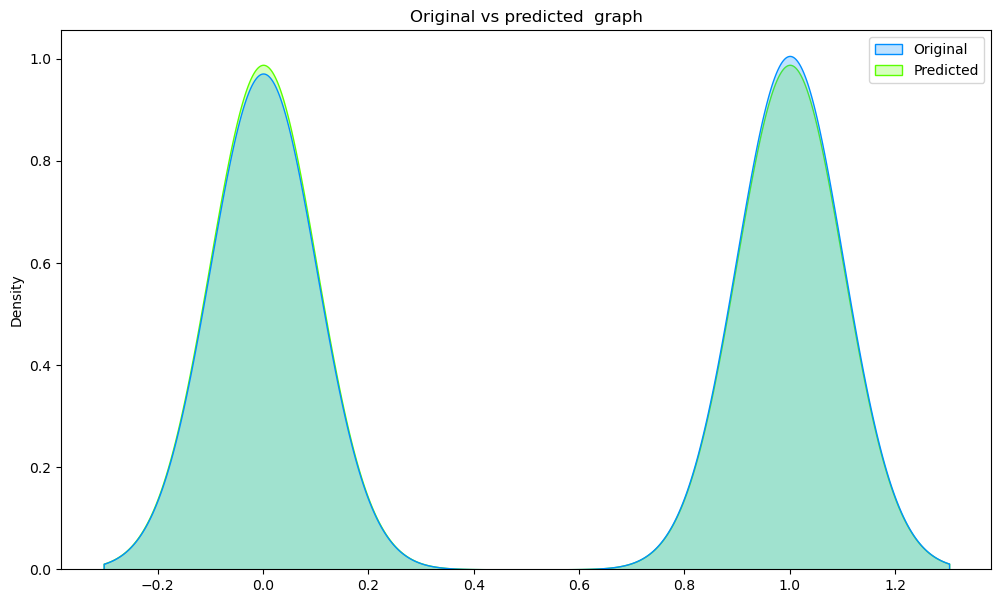

In [332]:
# Viewing the difference of prediction using Visualization 
plt.figure(figsize=(12,7))
sns.kdeplot(data=df_new, palette='gist_rainbow_r',gridsize=900, shade=True)
plt.title('Original vs predicted  graph')

- We can observe very little difference in predicted and the original output graph.

### Concluding Remarks for Classification Model

* We have predicted the outcome of RainTomorrow in Australia by collecting the dataset of Rainfall Weather Forecasting having different records of temp, humidity, sunshine, pressure variations according to day and night of various locations
* We classified the output of "RainTomorrow" using classification model. The prediction accuracies of these models were then checked.
* Also cross-validation was performed to avoid overfitting of models.
* The prediction results indicated that GradientBoosting Classifier model achieved higher prediction accuracy.

## (Approach 2: 'Regression Model to predict how much rainfall could be there. )

### Data Preprocessing

### Seperating Input and Target variables

In [333]:
x1=df_rain.drop(columns='Rainfall')
y1=df_rain['Rainfall']

In [334]:
x1.shape

(6409, 24)

In [335]:
y1.shape

(6409,)

### Data Transformation to treat Skewness

#### Checking Skewness

In [336]:
x1.skew()

Location         0.004558
MinTemp         -0.079107
MaxTemp          0.265797
Evaporation      0.721400
Sunshine        -0.890629
WindGustDir      0.103596
WindGustSpeed    0.477235
WindDir9am       0.210848
WindDir3pm      -0.128886
WindSpeed9am     0.677433
WindSpeed3pm     0.341549
Humidity9am     -0.233044
Humidity3pm      0.158509
Pressure9am      0.064023
Pressure3pm      0.090093
Cloud9am        -0.203578
Cloud3pm        -0.147217
Temp9am         -0.072513
Temp3pm          0.290192
RainToday        1.331440
RainTomorrow     1.330358
Day              0.004771
Month            0.032770
Year             0.352924
dtype: float64

- keeping the acceptable range +/- 0.5, we can see skewness is present in columns: 'Evaporation','Sunshine','WindSpeed9am','RainToday','RainTomorrow'

- but 'RainToday','RainTomorrow' are categorical columns, we will not remove skewness from them 

#### Applying Transformation Method

In [337]:
x1=pd.DataFrame(x1)
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer() 
skew_col = ['Sunshine','Evaporation','WindSpeed9am']
x1[skew_col]= pt.fit_transform(x1[skew_col].values)

In [338]:
# Rechecking the skewness
x1.skew()

Location         0.004558
MinTemp         -0.079107
MaxTemp          0.265797
Evaporation      0.071784
Sunshine        -0.054513
WindGustDir      0.103596
WindGustSpeed    0.477235
WindDir9am       0.210848
WindDir3pm      -0.128886
WindSpeed9am    -0.132158
WindSpeed3pm     0.341549
Humidity9am     -0.233044
Humidity3pm      0.158509
Pressure9am      0.064023
Pressure3pm      0.090093
Cloud9am        -0.203578
Cloud3pm        -0.147217
Temp9am         -0.072513
Temp3pm          0.290192
RainToday        1.331440
RainTomorrow     1.330358
Day              0.004771
Month            0.032770
Year             0.352924
dtype: float64

Obs- We can see skewness has been removed from those columns on which transformation was applied

### Data Scaling

In [339]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x1 = pd.DataFrame(scaler.fit_transform(x1), columns=x1.columns)
x1

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,-1.391396,0.069172,-0.190821,0.155534,-0.118386,1.222524,0.483303,1.317076,1.373685,0.905389,...,-1.436942,1.495570,0.017600,-0.162690,-0.149628,-0.535675,-0.535916,-1.672284,1.655296,-1.770498
1,-1.391396,-1.013829,0.174339,0.155534,-0.118386,1.413467,0.483303,-0.222676,1.596977,-0.858881,...,-1.313436,0.014663,0.017600,-0.109936,0.276421,-0.535675,-0.535916,-1.558519,1.655296,-1.770498
2,-1.391396,-0.021078,0.273928,0.155534,-0.118386,1.604410,0.646634,1.317076,1.596977,0.822838,...,-1.154643,0.014663,-0.982885,0.558287,0.088960,-0.535675,-0.535916,-1.444754,1.655296,-1.770498
3,-1.391396,-0.688929,0.655685,0.155534,-0.118386,-0.495963,-1.149999,0.437218,-1.752399,0.067403,...,-0.431253,0.014663,0.017600,0.048327,0.651345,-0.535675,-0.535916,-1.330989,1.655296,-1.770498
4,-1.391396,0.809223,1.369406,0.155534,-0.118386,1.222524,0.238308,-1.322499,-0.189357,-0.411105,...,-1.631022,1.091303,1.603475,-0.004427,1.196689,-0.535675,-0.535916,-1.217224,1.655296,-1.770498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6404,1.203340,-1.844130,-0.107830,0.155534,-0.118386,-1.259735,-0.578343,0.437218,-1.529108,0.275785,...,0.892021,0.014663,0.017600,-1.358458,-0.047376,-0.535675,-0.535916,0.603012,-0.134362,2.169323
6405,1.203340,-1.699730,0.207535,0.155534,-0.118386,-0.114077,-1.313329,0.437218,-1.082524,0.275785,...,0.680297,0.014663,0.017600,-1.217780,0.310505,-0.535675,-0.535916,0.716777,-0.134362,2.169323
6406,1.203340,-1.374830,0.473105,0.155534,-0.118386,-0.686906,-0.088352,0.437218,1.373685,-0.159565,...,0.274493,0.014663,0.017600,-0.936423,0.583177,-0.535675,-0.535916,0.830541,-0.134362,2.169323
6407,1.203340,-0.941629,0.489704,0.155534,-0.118386,0.458752,-0.823338,0.657182,-1.082524,0.275785,...,0.221562,-0.525762,-0.982885,-0.479217,0.566135,-0.535675,-0.535916,0.944306,-0.134362,2.169323


### Checking Multi-Collinearity

In [340]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x1.values,i)
              for i in range(len(x1.columns))]
vif["Features"] = x1.columns

# Let's check the values
vif

,VIF values,Features
0,1.658933,Location
1,9.244157,MinTemp
2,26.322226,MaxTemp
3,1.643293,Evaporation
4,2.188432,Sunshine
5,1.590691,WindGustDir
6,2.260706,WindGustSpeed
7,1.348053,WindDir9am
8,1.422001,WindDir3pm
9,2.019553,WindSpeed9am


* Keeping the acceptable range as below or equal 10, we observe the VIF of 'MaxTemp', 'Pressure9am', 'Pressure3pm','Temp9am','Temp3pm' is high

* Deleting the columns 'Temp9am','Temp3pm','Pressure9am','Pressure3pm' 

In [341]:
x1.drop('Temp9am', axis =1, inplace=True) # Dropping 'Temp9am' column

In [342]:
x1.drop('Temp3pm', axis =1, inplace=True) # Dropping 'Temp3pm' column

In [343]:
x1.drop('Pressure9am', axis =1, inplace=True)   # Dropping 'Pressure9am' column

In [344]:
x1.drop('Pressure3pm', axis =1, inplace=True)   # Dropping 'Pressure3pm' column

In [345]:
x1.shape

(6409, 20)

In [346]:
# Rechecking the VIF
vif_cal1()

    VIF Factor       Features
0     1.649163       Location
1     4.723493        MinTemp
2     5.505255        MaxTemp
3     1.586580    Evaporation
4     2.144593       Sunshine
5     1.560376    WindGustDir
6     2.094584  WindGustSpeed
7     1.320079     WindDir9am
8     1.345315     WindDir3pm
9     1.985862   WindSpeed9am
10    1.906633   WindSpeed3pm
11    2.585747    Humidity9am
12    3.213446    Humidity3pm
13    1.998761       Cloud9am
14    1.918559       Cloud3pm
15    1.380628      RainToday
16    1.458633   RainTomorrow
17    1.003454            Day
18    1.111252          Month
19    1.575010           Year


- We can see no multicollinearity in the data now

### Data Modelling(Regressionn Model)

In [355]:
#importing necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

In [356]:
# Finding Best Random State
maxAccu=0
maxRS=0
for i in range(1,200):
    x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=.30, random_state =i)
    lr = LinearRegression()
    lr.fit(x1_train, y1_train)
    pred1 = lr.predict(x1_test)
    acc=r2_score(y1_test, pred1)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.5175581090945998  on Random_state  122


#### Splitting data into Train-Test

In [357]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.30,random_state=maxRS)

In [358]:
x1_train.shape

(4486, 20)

In [359]:
y1_train.shape

(4486,)

In [360]:
x1_test.shape

(1923, 20)

In [361]:
y1_test.shape

(1923,)

### Using various Machine Learning Algorithms

In [362]:


model=[LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),Ridge(),SVR(),AdaBoostRegressor(),Lasso(alpha=0.1)]
for m in model:
    print("===============================================================================")
    print('Accuracy score of :', m)
    m.fit(x1_train,y1_train)
    pred = m.predict(x1_test)
    print("R2 Score:                ", r2_score(y1_test,pred))
    print("Mean Absolute Error:     ", mean_absolute_error(y1_test,pred))
    print("Mean Squared error:      ", mean_squared_error(y1_test,pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y1_test,pred)))
    score=cross_val_score(m,x1,y1,cv=5)
    print(score)
    print("cross validation score:  ",score.mean())
    print("Difference between R2 score and cross validatio score is :  ",r2_score(y1_test,pred)-abs(score.mean()))
    print("===============================================================================")


Accuracy score of : LinearRegression()
R2 Score:                 0.5175581090945998
Mean Absolute Error:      1.5479430438155592
Mean Squared error:       11.092231045887967
Root Mean Squared Error:  3.3305001194847548
[0.50043264 0.48441194 0.46352622 0.46419059 0.53084163]
cross validation score:   0.48868060264499275
Difference between R2 score and cross validatio score is :   0.028877506449607016
Accuracy score of : RandomForestRegressor()
R2 Score:                 0.5259072791883128
Mean Absolute Error:      1.327690086287027
Mean Squared error:       10.900268188875117
Root Mean Squared Error:  3.301555419628015
[0.49817501 0.4559566  0.44180342 0.47431587 0.54601576]
cross validation score:   0.48325333062982956
Difference between R2 score and cross validatio score is :   0.04265394855848326
Accuracy score of : DecisionTreeRegressor()
R2 Score:                 0.11537153175850057
Mean Absolute Error:      1.6907057979179076
Mean Squared error:       20.33924405090429
Root Mean S

Obs- 
* Unfortunately, all the models are giving very low r2_score, and thus we can say all the machine learning algorithms are not much suitable for this dataset in calculating Rainfall in mm appropriately.
* The difference between r2_score and cv score is least in Linear Regression, Support Vector Regressor,Lasso,Ridge and GradientBoostingRegressor, thus finding best parameters for Ridge through hyper parameter tuning below 

### Hyper Parameter Tuning

In [364]:
#import the randomized search CV
from sklearn.model_selection import GridSearchCV
parameters = {'max_iter' :[0,10,20],
              'random_state':[15,16,17],
              'solver' : [ 'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
Rd=Ridge()

clf = GridSearchCV(Ridge(), parameters, cv=5)
clf.fit(x1_train, y1_train)
clf.best_params_  #Best parameters

{'max_iter': 20, 'random_state': 15, 'solver': 'sag'}

In [366]:
clf_pred=clf.best_estimator_.predict(x1_test)

In [367]:
r2_score(y1_test, clf_pred)

0.5175709008083127

- Our best model  has given r2_score= 0.51  

### Saving the best Regressor model

In [368]:
import joblib

joblib.dump(clf.best_estimator_,'rainfall.obj')

['rainfall.obj']

In [369]:
rainfall_model=joblib.load('rainfall.obj')

In [370]:
# Viewing Attributes of the best model
rainfall_model

Ridge(max_iter=20, random_state=15, solver='sag')

### Prediction

In [371]:
ori1 = np.array(y1_test)
predicted1 = np.array(rainfall_model.predict(x1_test))
df_new1 = pd.DataFrame({"Original":ori1,"Predicted":predicted1},index= range(len(ori1)))
df_new1

,Original,Predicted
0,0.0,-0.344745
1,0.4,0.268495
2,0.0,-0.670808
3,0.0,-0.588052
4,0.0,-0.029596
...,...,...
1918,0.0,0.290703
1919,0.0,0.155936
1920,0.0,0.554344
1921,0.0,-0.596725


Obs- We can see our best model has not yielded very good results

Text(0.5, 1.0, 'Original vs predicted  graph')

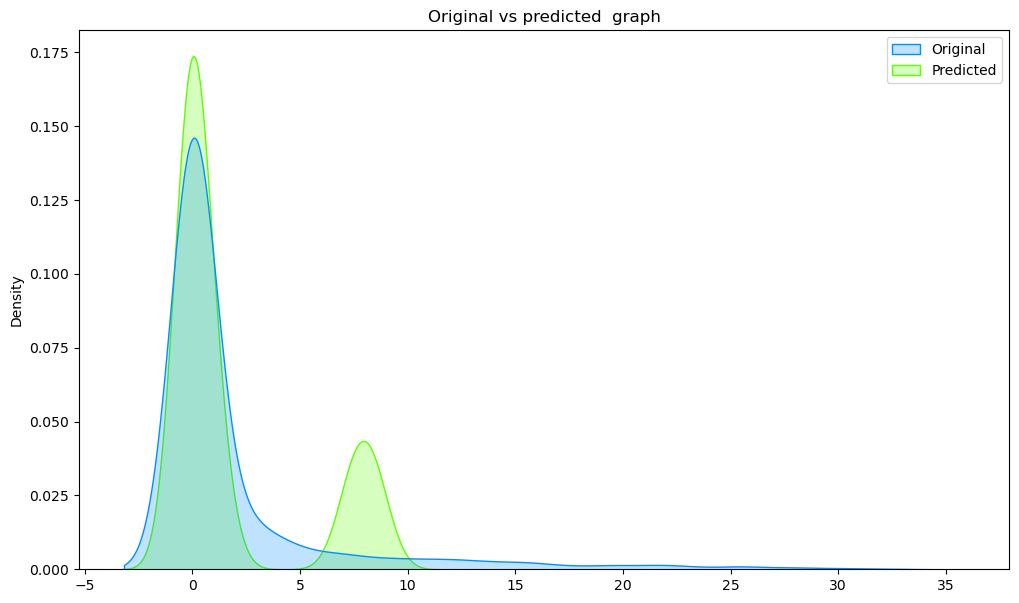

In [372]:
# Viewing the difference of prediction using Visualization 
plt.figure(figsize=(12,7))
sns.kdeplot(data=df_new1, palette='gist_rainbow_r',gridsize=900, shade=True)
plt.title('Original vs predicted  graph')

### Concluding Remarks for Regression Model

* We predicted the outcome of RainTomorrow in Australia by collecting the dataset of Rainfall Weather Forecasting having different records of temp, humidity, sunshine, pressure variations according to day and night of various locations. We classified the output of "Rainfall" using regression model.
* The r2_score of these models were then checked.
* Also cross-validation was performed to avoid overfitting of models.
* The prediction results indicated that Support Vector Regressor model achieved medium r2_score and has average results